<div style="display: flex; background-color: RGB(245, 203, 167);" >
<h1 style="margin: auto; padding: 30px; ">NETTOYAGE ET ANALYSE</h1>
    </div>

<h3 style="text-align:center;">Auteur : Julien SERE | Date : 2025-1-5</h3>

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuration des options
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)


## Importation des fichiers

In [2]:
#import customers

file_path = "C:/Users/julie/Downloads/OC Formation/P9/customers.csv"
try:
    customers = pd.read_csv(file_path, sep=";")
    print("Données chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement des données : {e}")

Données chargées avec succès.


In [3]:
#import products

file_path = "C:/Users/julie/Downloads/OC Formation/P9/products.csv"
try:
    products = pd.read_csv(file_path, sep=";")
    print("Données chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement des données : {e}")

Données chargées avec succès.


In [4]:
#import transactions

file_path = "C:/Users/julie/Downloads/OC Formation/P9/transactions.csv"
try:
    transactions = pd.read_csv(
    file_path, 
    sep=";",               
    parse_dates=['date'],  
    dtype={
        'id_prod': 'str', 
        'session_id': 'str', 
        'client_id': 'str'
    }                      
)
    print("Données chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement des données : {e}")

Données chargées avec succès.


## Analyse exploratoire des fichiers

Avant d'étudier les indicateurs clés de l'activité en ligne de la librairie Lapage, nous nous assurerons de la bonne configuration et mise en forme des données pour permettre une analyse la plus claire et facilitée possible.

### Clients

In [5]:
# Aperçu des données
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [6]:
#Dimensions
customers.shape

(8621, 3)

Il y a 8621 clients enregistrés dans la base de données

In [7]:
#Informations sur les colonnes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
#Conversion en chaine de caractère
customers['client_id'] = customers['client_id'].astype('string')
customers['sex'] = customers['sex'].astype('string')

In [9]:
#valeurs nulles ?
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [10]:
#Check des doublons
duplicate_customers = customers[customers['client_id'].duplicated()]
duplicate_customers

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

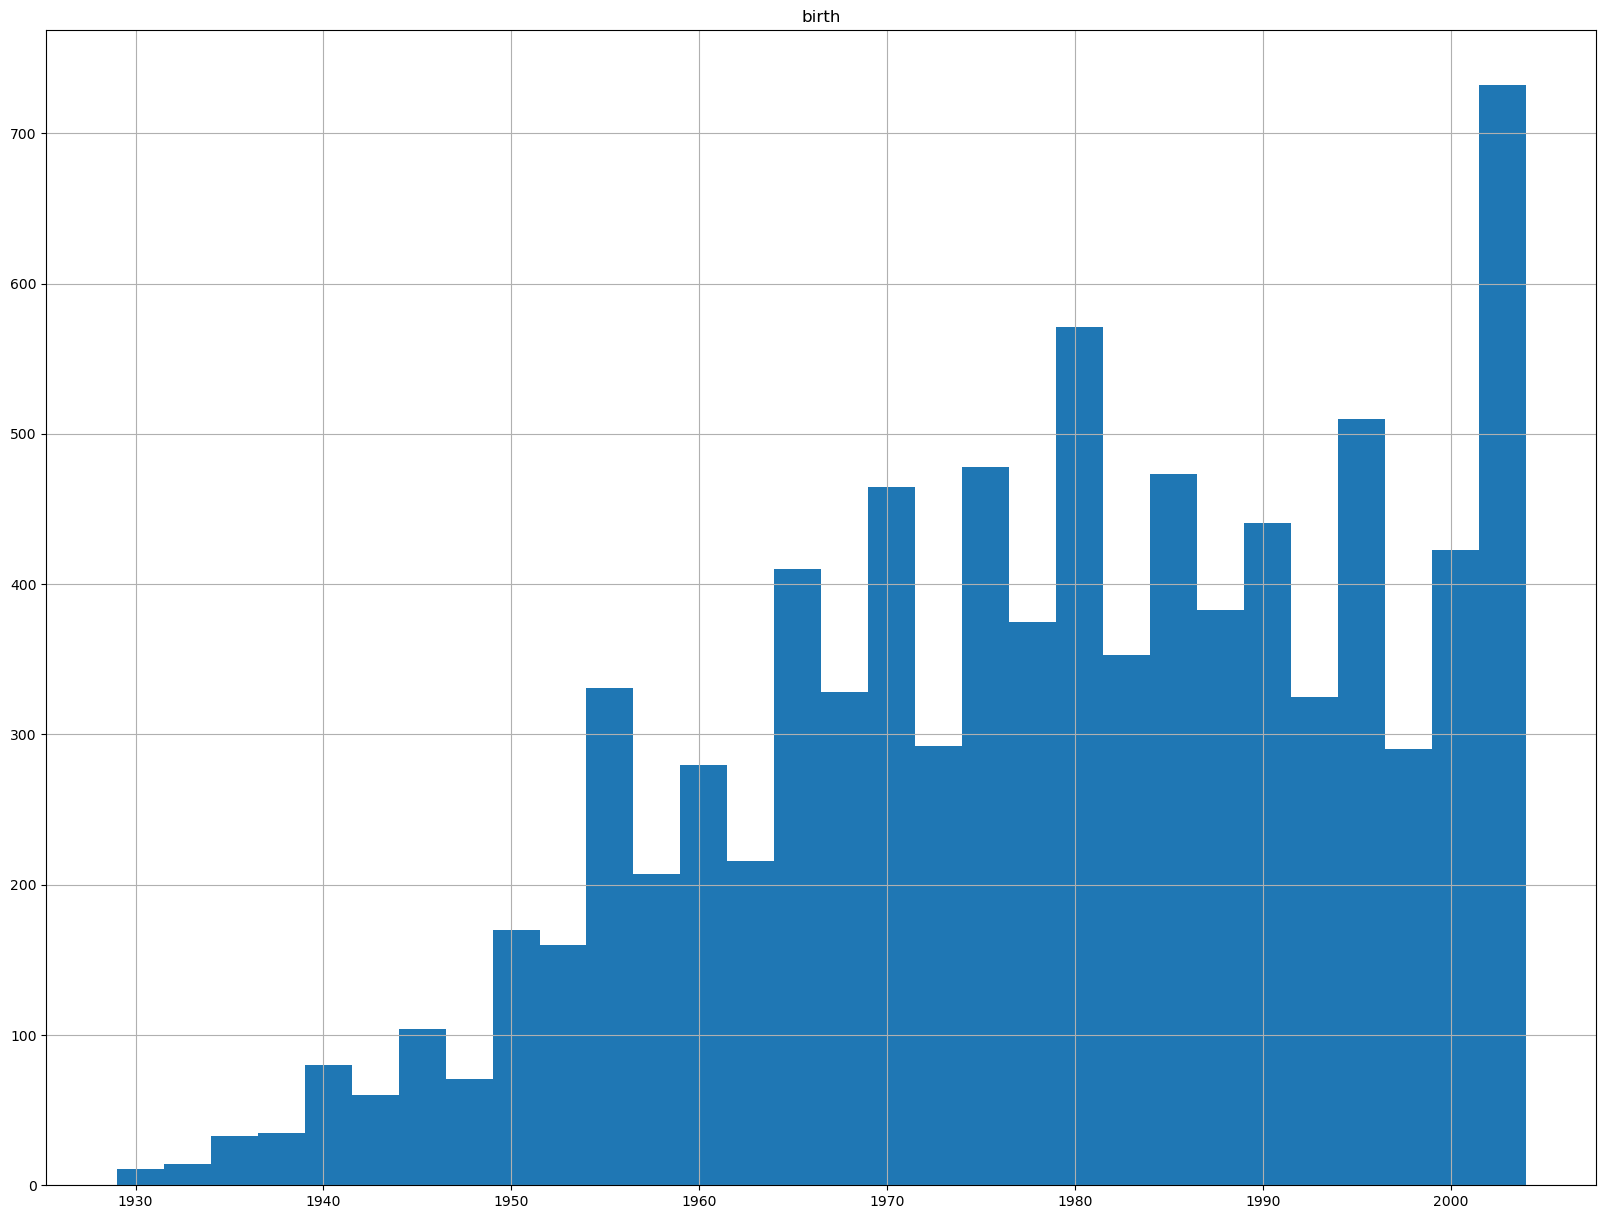

In [11]:
#Distribution des variables
customers.hist(bins=30, figsize=(20, 15))
plt.show()

Consommateurs majeurs nés après 1980  avec un pic dans les années 2000

In [12]:
occurences_customers = customers['birth'].value_counts()
occurences_customers

birth
2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1933      8
1932      6
1931      4
1930      4
1929      3
Name: count, Length: 76, dtype: int64

Le pic est mesurable chez les personnes nés en 2004

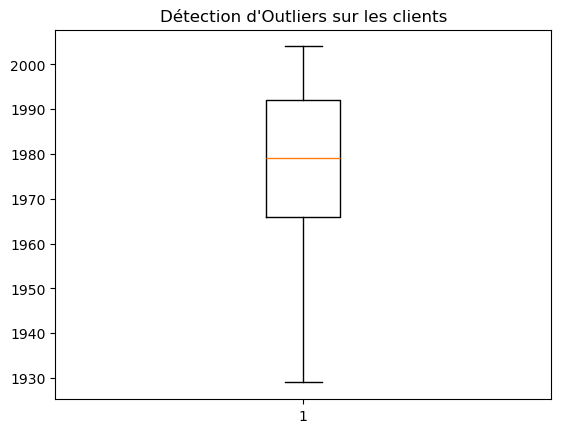

In [13]:
#Recherche d'outliers
plt.boxplot(customers['birth'])
plt.title("Détection d'Outliers sur les clients")
plt.show()

L'analyse de la table clients ne montre pas d'anomalie evidente dans la distribution des variables clients

In [14]:
#Ajout d'une colonne âge qui nous sera utile pour nos analyses par la suite

import datetime as dt 
currentYear = dt.date.today().year
customers['age'] = currentYear - customers['birth']

### Products

In [15]:
# Aperçu des données
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [16]:
#Dimensions du Dataframe 
products.shape

(3286, 3)

Il y a 3286 produits référencés en ligne.

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [18]:
#Conversion en chaine de caractères 
products['id_prod'] = products['id_prod'].astype('string')

In [19]:
products['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

Le prix moyen est à 21 euros. Le prix maximum est de 300 euros.

In [20]:
products['categ'].value_counts()

categ
0    2308
1     739
2     239
Name: count, dtype: int64

Il y a 3 catégories de produits, la boutique compte une majorité de produits de catégorie 0.

In [21]:
#Check des valeurs nulles
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [22]:
#Check des doublons 
duplicate_products = products[products['id_prod'].duplicated()]
duplicate_products

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

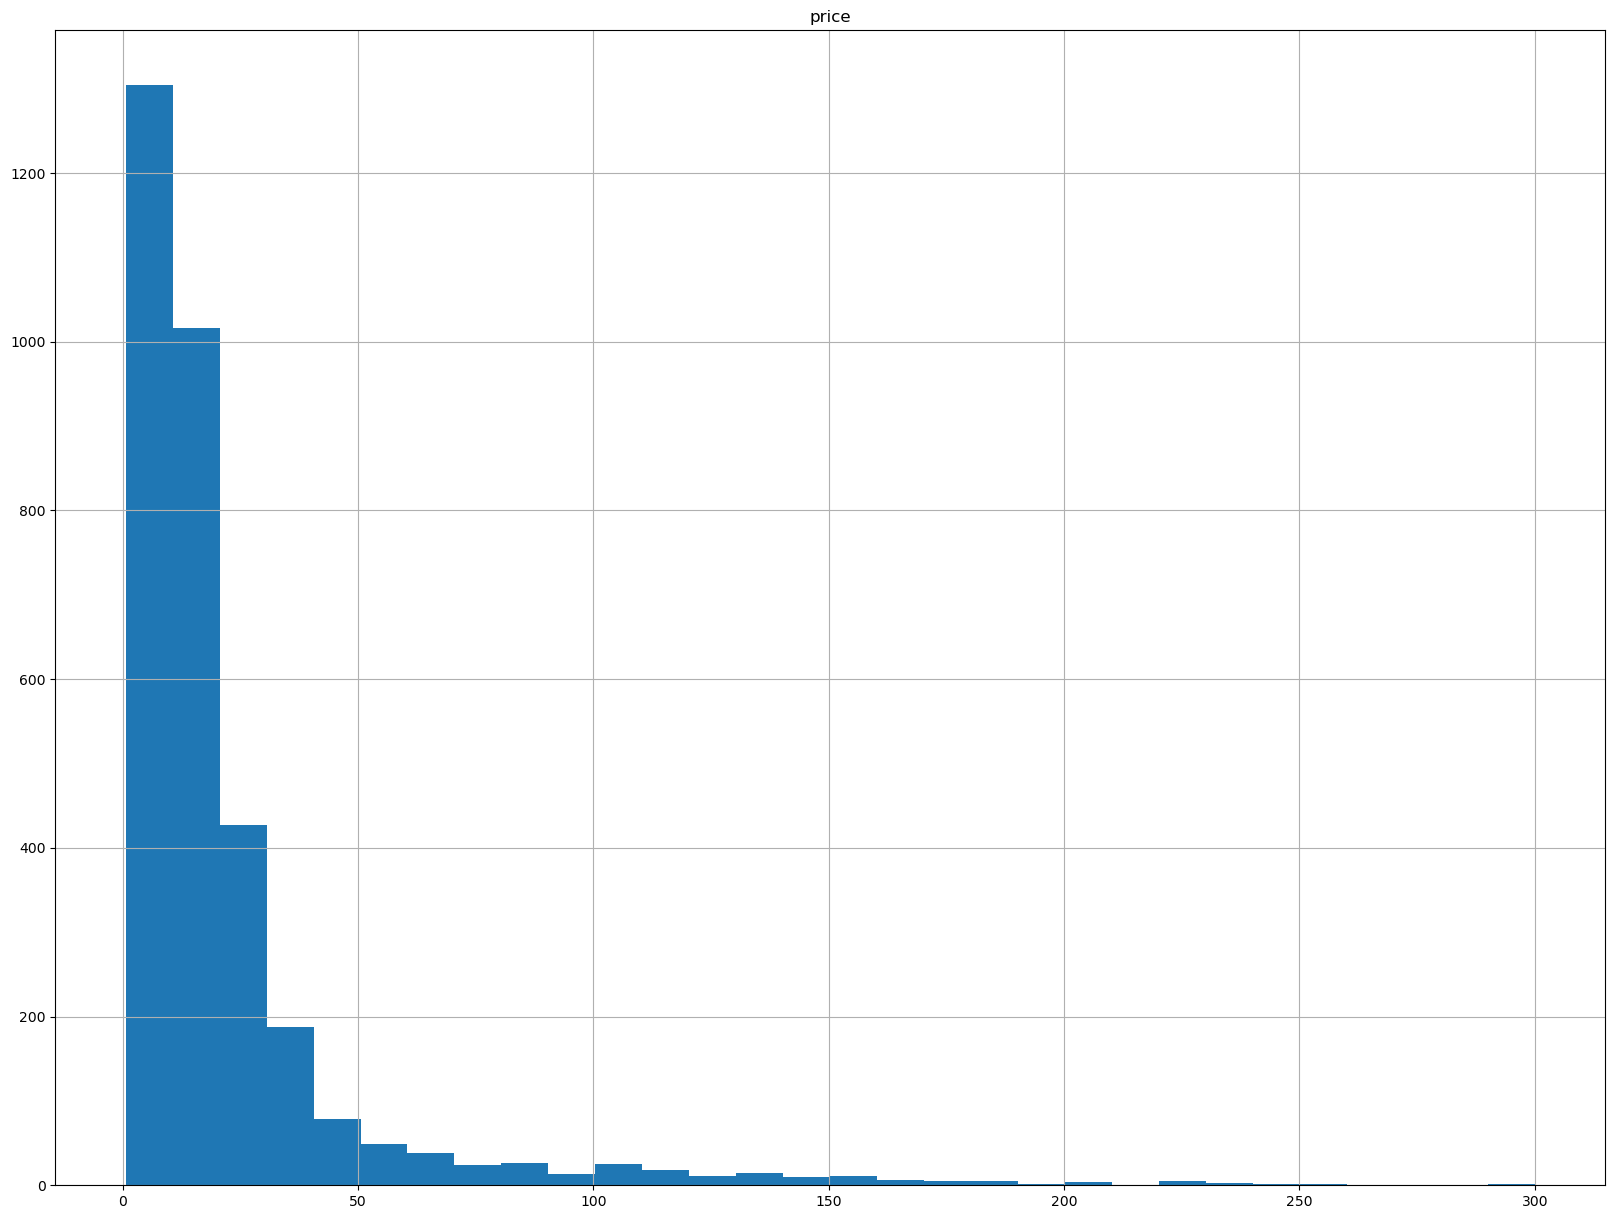

In [23]:
# Distribution des variables
products.hist('price', bins=30, figsize=(20, 15))
plt.show()

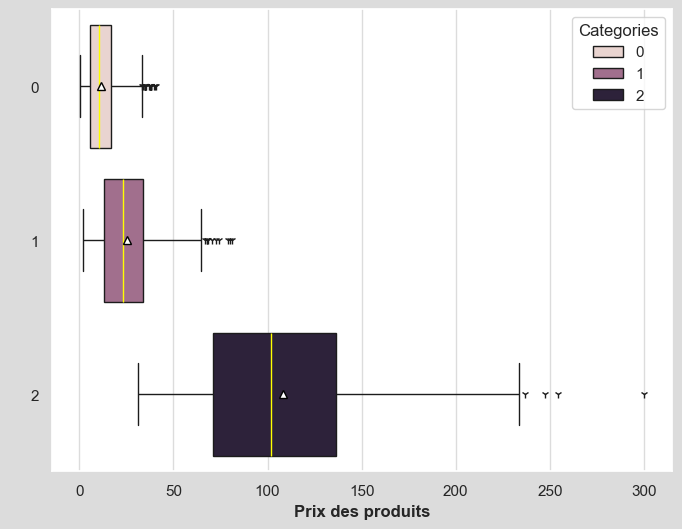

In [24]:
#Détection des outliers par catégorie de livres

#Génération de 3 boxplot avec seaborn
sns.set(rc={'figure.figsize':(8,6),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph2 = sns.boxplot(data=products, y="categ", x="price", hue="categ", flierprops={"marker": "1"},
            medianprops={"color" : "yellow"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="h", showmeans=True, dodge=False)
plt.xlabel('Prix des produits', fontweight='bold', fontsize=12)
plt.ylabel(' ', fontweight='bold', fontsize=12)
plt.legend(title="Categories")
plt.grid(axis='x', color='gainsboro')
plt.savefig("graph2.png", bbox_inches='tight')
plt.show()

Pour les 3 catégories, on oberseve des produits qui sortent du boxplot par le haut, on utilise alors la méthode de l'écart interquartile pour rechercher les outliers, étant donné que les données ne semblent pas normalement distribuées, cette méthode semble plus adaptée.

In [25]:
# Calcul des quartiles et de l'IQR
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des outliers
outliers = products[(products['price'] < lower_bound) | (products['price'] > upper_bound)]
print("Outliers détectés :")
outliers

Outliers détectés :


id_prod   price  categ
10     2_228  225.17      2
11     1_178   51.92      1
38     2_100   72.11      2
49      1_48   47.22      1
64      2_89  107.99      2
...      ...     ...    ...
3266   2_101   63.99      2
3268   1_543   51.99      1
3270   2_123  147.99      2
3278   1_331   55.99      1
3281    2_23  115.99      2

[302 rows x 3 columns]

Etant donné la grande quantité de produits, je décide de garder les 300 outliers qui peuvent faire référence à des produits rares ou en édition limitée. En l'absence d'information, il est impossible de déterminer si ces valeurs sont aberrantes ou atypiques, les produits concernés seront donc tous conservés pour les analyses suivantes.

### Transactions

In [26]:
transactions.head()

id_prod                       date session_id client_id
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033

In [27]:
transactions.shape

(1048575, 4)

1 048 575 de transactions ont été enregistré sur le site

In [28]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [29]:
transactions.describe()

date
count                         687534
mean   2022-03-01 21:24:00.618519296
min       2021-03-01 00:01:07.843138
25%    2021-09-10 10:35:20.642323456
50%    2022-02-27 06:50:25.400120064
75%    2022-08-28 22:16:49.841665536
max       2023-02-28 23:58:30.792755

Les données de vente vont du 1er mars 2021 au 28 février 2022, soit deux exercices comptable au complet.

In [30]:
#Conversion en chaînes de caractères 
transactions['id_prod'] = transactions['id_prod'].astype('string')
transactions['session_id'] = transactions['session_id'].astype('string')
transactions['client_id'] = transactions['client_id'].astype('string')

In [31]:
#Conversion de la colonne date en datetime jour
transactions['date_only'] = pd.to_datetime(transactions['date']).dt.date
transactions['date_only'] = pd.to_datetime(transactions['date_only'])

#Groupement de la table par jour
transactions_grouped = transactions.groupby('date_only')[['session_id', 'id_prod']].agg(
    count_session_id=('session_id', 'count'),
    count_id_prod=('id_prod', 'count'),
    unique_id_prod=('id_prod', 'nunique')
).reset_index()

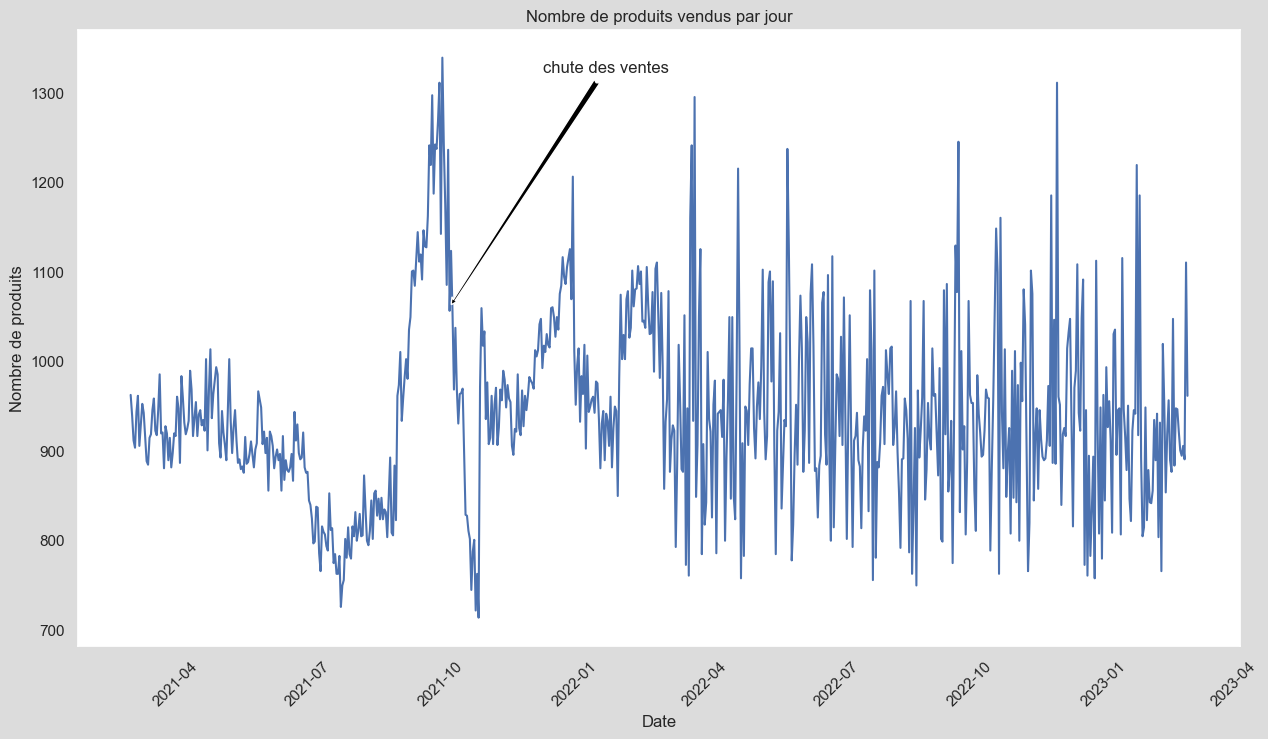

In [32]:
#Courbe d'évolution des ventes
sns.set(rc={'figure.figsize': (15, 8), 'axes.facecolor': 'white', 'figure.facecolor': 'gainsboro'})
graph3 = sns.lineplot(data=transactions_grouped, x='date_only', y='count_id_prod')
graph3.annotate('chute des ventes',xy=(0.32,0.55),xycoords='axes fraction',xytext=(0.40,.95),
            textcoords='axes fraction',va='top',ha='left',arrowprops=dict(facecolor='black', arrowstyle='fancy'))

# Ajuster les ticks sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)
plt.title("Nombre de produits vendus par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de produits")
plt.show()



In [33]:
transactions.isnull().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
date_only     361041
dtype: int64

Il y a 361 041 lignes vides dans le tableau des transactions. Il convient de les supprimer du tableau

In [34]:
#Suppression des lignes avec valeurs nulles 
transactions_cleaned = transactions.dropna()

In [35]:
# Ajout de la colonne du jour de vente de la semaine 
transactions['jour_vente'] = transactions['date'].dt.strftime('%a').astype('string')

# Ajout de la colonne année de vente
transactions['annee_vente'] = transactions['date'].dt.strftime('%Y').astype('string')

# Ajout de la colonne mois de vente
transactions['mois_vente'] = transactions['date'].dt.strftime('%b').astype('string')

### Vérification des éventuelles absences d'informations sur des transactions

In [36]:
#Vérification des livres vendus en ligne mais absent de la table books 

# Nombre d'identifiants produits uniques dans le fichier products
ref = len(products['id_prod'].unique())
print(ref, "identifiants produit uniques sont présents dans le fichier products.")

# Nombre d'identifiants produits uniques dans le fichier transactions
sold = len(transactions['id_prod'].unique())
print(sold, "identifiants produit uniques sont présents dans le fichier transactions.")

# Nettoyer les colonnes pour éviter les valeurs manquantes
products_clean = products['id_prod'].dropna().unique()
transactions_clean = transactions['id_prod'].dropna().unique()

# Identifier les références uniques dans chaque fichier
list_c = products_clean.tolist()  # Références dans products
list_d = transactions_clean.tolist()  # Références dans transactions

# Définir la fonction pour trouver les références manquantes
def isInList(list_d, list_c):
    return [item for item in list_d if item not in list_c]

# Liste des livres vendus mais absents de la table books
no_ref = isInList(list_d, list_c)
print("\nListe des livres vendus en ligne mais absents du fichier books:\n")
print(no_ref)

3286 identifiants produit uniques sont présents dans le fichier products.
3266 identifiants produit uniques sont présents dans le fichier transactions.

Liste des livres vendus en ligne mais absents du fichier books:

[]


Il n'y a pas de livres vendus en ligne mais absents du fichiers books

In [37]:
#Vérification des clients ayant opéré une transaction mais absent de la table clients 

# Nombre d'identifiants produits uniques dans le fichier customers
ref_client = len(customers['client_id'].unique())
print(ref_client, "identifiants clients uniques sont présents dans le fichier customers.")

# Nombre d'identifiants produits uniques dans le fichier transactions
sold_client = len(transactions_cleaned['client_id'].unique())
print(sold_client, "identifiants produit uniques sont présents dans le fichier transactions.")

# Nettoyer les colonnes pour éviter les valeurs manquantes
client_clean = customers['client_id'].dropna().unique()
transactions_client_clean = transactions_cleaned['client_id'].dropna().unique()

# Identifier les références uniques dans chaque fichier
list_a = client_clean.tolist()  # Références dans products
list_b = transactions_client_clean.tolist()  # Références dans transactions

# Définir la fonction pour trouver les références manquantes
def isInList(list_b, list_a):
    return [item for item in list_b if item not in list_a]

# Liste des livres vendus mais absents de la table books
no_ref_client = isInList(list_b, list_a)
print("\nListe des clients ayant opéré une transaction mais absent de la table clients :\n")
print(no_ref_client)

8621 identifiants clients uniques sont présents dans le fichier customers.
8600 identifiants produit uniques sont présents dans le fichier transactions.

Liste des clients ayant opéré une transaction mais absent de la table clients :

[]


Il n'y a pas de clients ayant opéré une transaction mais absent de la table clients

## Jointure

In [38]:
merge = pd.merge(transactions_cleaned, products, on="id_prod", how="left")
merge

id_prod                       date session_id client_id  date_only  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329 2021-03-01   
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664 2021-03-01   
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580 2021-03-01   
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912 2021-03-01   
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033 2021-03-01   
...        ...                        ...        ...       ...        ...   
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573 2023-02-28   
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50 2023-02-28   
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488 2023-02-28   
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848 2023-02-28   
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575 2023-02-28   

        price  categ  
0       11.99      0  
1       19.37      0  
2        4.50      0  
3        6.55      0  
4       16.49      0  
...       ...    ...  
687529  21.92      1  
687530  48.99      2  
687531  26.99      1  
687532   8.99      0  
687533   4.52      0  

[687534 rows x 7 columns]

In [39]:
#On cherche les produits sans correspondances qui n'ont pas été pris en compte dans la jointure 
products_sans_cor = products[~products['id_prod'].isin(merge['id_prod'])]
products_sans_cor

id_prod   price  categ
184   0_1016   35.06      0
279   0_1780    1.67      0
736   0_1062   20.08      0
793   0_1119    2.99      0
810   0_1014    1.15      0
...      ...     ...    ...
2407  0_1624   24.50      0
2524    2_86  132.36      2
2689   0_299   22.99      0
3030   0_510   23.66      0
3095  0_2308   20.28      0

[21 rows x 3 columns]

21 produits n'ont pas fait l'objets de transactions, leur répartition ne semble pas anormale, il ne s'agit pas d'anomalies. Ces produits sont des flops, surtout si ils sont bien disponibles à la vente, je décide de les ajouter au merge en faisant une jointure de type outer.

In [40]:
merge = pd.merge(transactions_cleaned, products, on="id_prod", how="outer")
merge

id_prod                       date session_id client_id  date_only  \
0          0_0 2021-03-01 13:45:51.575117      s_282    c_5152 2021-03-01   
1          0_0 2021-03-02 06:42:55.351333      s_621    c_2917 2021-03-02   
2          0_0 2021-03-02 18:49:49.651862      s_852    c_3988 2021-03-02   
3          0_0 2021-03-02 21:57:33.862118      s_908    c_1004 2021-03-02   
4          0_0 2021-03-03 23:59:48.997483     s_1379     c_278 2021-03-03   
...        ...                        ...        ...       ...        ...   
687550    2_99 2022-05-21 01:53:46.967570   s_211661    c_5828 2022-05-21   
687551    2_99 2022-07-21 01:53:46.967570   s_241374    c_5828 2022-07-21   
687552    2_99 2022-11-11 20:56:49.820935   s_296127    c_7135 2022-11-11   
687553    2_99 2022-12-11 20:56:49.820935   s_310606    c_7135 2022-12-11   
687554    2_99 2023-01-21 01:53:46.967570   s_329932    c_5828 2023-01-21   

        price  categ  
0        3.75      0  
1        3.75      0  
2        3.75      0  
3        3.75      0  
4        3.75      0  
...       ...    ...  
687550  84.99      2  
687551  84.99      2  
687552  84.99      2  
687553  84.99      2  
687554  84.99      2  

[687555 rows x 7 columns]

In [41]:
#Faisons maintenant la jointure avec la table customers
merge_global = pd.merge(merge, customers, on="client_id", how="left")
merge_global


id_prod                       date session_id client_id  date_only  \
0          0_0 2021-03-01 13:45:51.575117      s_282    c_5152 2021-03-01   
1          0_0 2021-03-02 06:42:55.351333      s_621    c_2917 2021-03-02   
2          0_0 2021-03-02 18:49:49.651862      s_852    c_3988 2021-03-02   
3          0_0 2021-03-02 21:57:33.862118      s_908    c_1004 2021-03-02   
4          0_0 2021-03-03 23:59:48.997483     s_1379     c_278 2021-03-03   
...        ...                        ...        ...       ...        ...   
687550    2_99 2022-05-21 01:53:46.967570   s_211661    c_5828 2022-05-21   
687551    2_99 2022-07-21 01:53:46.967570   s_241374    c_5828 2022-07-21   
687552    2_99 2022-11-11 20:56:49.820935   s_296127    c_7135 2022-11-11   
687553    2_99 2022-12-11 20:56:49.820935   s_310606    c_7135 2022-12-11   
687554    2_99 2023-01-21 01:53:46.967570   s_329932    c_5828 2023-01-21   

        price  categ sex   birth   age  
0        3.75      0   f  1986.0  39.0  
1        3.75      0   m  1988.0  37.0  
2        3.75      0   f  1962.0  63.0  
3        3.75      0   m  1973.0  52.0  
4        3.75      0   f  1987.0  38.0  
...       ...    ...  ..     ...   ...  
687550  84.99      2   f  1998.0  27.0  
687551  84.99      2   f  1998.0  27.0  
687552  84.99      2   m  1996.0  29.0  
687553  84.99      2   m  1996.0  29.0  
687554  84.99      2   f  1998.0  27.0  

[687555 rows x 10 columns]

En regardant le dataframe de plus près, les id_produit semblent correspondre aux catégories. L'ID Produit prend la forme 'categ'_'numéro du produit'. Vérifions cela

In [42]:
# Création d'une copie
merge_global_copy = merge_global.copy()

#Ajotuer une colonne avec le 1er caractère de l'id produit
merge_global_copy['pid_0'] = merge_global_copy['id_prod'].str[:1]

#Conversion en chaine de caractères
merge_global_copy['categ'] = merge_global_copy['categ'].astype(str)
merge_global_copy['pid_0'] = merge_global_copy['pid_0'].astype(str)

#Création d'une valeur boléenne pour vérifier si le 1er caractère de l'id produit est égal au numéro de la catégorie
merge_global_copy['check'] = merge_global_copy['categ'] == merge_global_copy['pid_0']
merge_global_copy.shape

(687555, 12)

In [43]:
#On compte le nombre de lignes où le 1er caractère de l'id produit est égal au numéro de la catégorie 
merge_global_copy.loc[merge_global_copy['check'] == True].count()

id_prod       687555
date          687534
session_id    687534
client_id     687534
date_only     687534
               ...  
sex           687534
birth         687534
age           687534
pid_0         687555
check         687555
Length: 12, dtype: int64

In [44]:
merge_global_copy.loc[merge_global_copy['check'] == False].count()

id_prod       0
date          0
session_id    0
client_id     0
date_only     0
             ..
sex           0
birth         0
age           0
pid_0         0
check         0
Length: 12, dtype: int64

Les id_produit correspondent bien aux catégories. On cherche désormais les produits sans correspondances qui n'ont pas été pris en compte dans la jointure .

In [45]:
#On cherche les produits sans correspondances qui n'ont pas été pris en compte dans la jointure 
customers_sans_cor = customers[~customers['client_id'].isin(merge_global['client_id'])]
customers_sans_cor

client_id sex  birth  age
801     c_8253   f   2001   24
2483    c_3789   f   1997   28
2734    c_4406   f   1998   27
2768    c_2706   f   1967   58
2850    c_3443   m   1959   66
...        ...  ..    ...  ...
6584     c_862   f   1956   69
6827    c_7584   f   1960   65
7789      c_90   m   2001   24
7818     c_587   m   1993   32
8534    c_3526   m   1956   69

[21 rows x 4 columns]

21 clients ne sont pas rattachés à une transaction sur le site internet. On ne note pas d'irregularites dans les donnees et les clients semblent distribues dans les 2 genres et des tranches d'age diverses. Cela peut-être dû à une erreur ou bien que ce sont des clients qui se sont inscrits mais qui ne sont pas passé à l'achat. Ils aurient pu abandonner leu panier.

In [46]:
merge_global['session_id'].duplicated().sum()

342049

In [47]:
#On génère le dataframe des produits n'ayant pas été vendus 
merge_global_null = merge_global[merge_global['date'].isnull()]
merge_global_null

id_prod date session_id client_id date_only   price  categ   sex  \
6073    0_1014  NaT       <NA>      <NA>       NaT    1.15      0  <NA>   
6511    0_1016  NaT       <NA>      <NA>       NaT   35.06      0  <NA>   
8723    0_1025  NaT       <NA>      <NA>       NaT   24.99      0  <NA>   
21687   0_1062  NaT       <NA>      <NA>       NaT   20.08      0  <NA>   
40971   0_1119  NaT       <NA>      <NA>       NaT    2.99      0  <NA>   
...        ...  ...        ...       ...       ...     ...    ...   ...   
415475     1_0  NaT       <NA>      <NA>       NaT   31.82      1  <NA>   
514820   1_394  NaT       <NA>      <NA>       NaT   39.73      1  <NA>   
685998    2_72  NaT       <NA>      <NA>       NaT  141.32      2  <NA>   
686501    2_86  NaT       <NA>      <NA>       NaT  132.36      2  <NA>   
686502    2_87  NaT       <NA>      <NA>       NaT  220.99      2  <NA>   

        birth  age  
6073      NaN  NaN  
6511      NaN  NaN  
8723      NaN  NaN  
21687     NaN  NaN  
40971     NaN  NaN  
...       ...  ...  
415475    NaN  NaN  
514820    NaN  NaN  
685998    NaN  NaN  
686501    NaN  NaN  
686502    NaN  NaN  

[21 rows x 10 columns]

## Analyse Exploratoire

### Analyse du C.A

In [48]:
# Calcul du CA/jour
CA_jour = merge_global.groupby(['date_only'])['price'].sum().reset_index()
CA_jour.rename(columns={'price': 'CA_jour'}, inplace=True)

In [49]:
# Calcul des moyennes glissantes du CA
CA_jour['semaine_glissant'] = CA_jour['CA_jour'].rolling(7, min_periods=1).mean()
CA_jour['mois_glissant'] = CA_jour['CA_jour'].rolling(30, min_periods=1).mean()
CA_jour['trimestre_glissant'] = CA_jour['CA_jour'].rolling(90, min_periods=1).mean()
CA_jour['annee_glissant'] = CA_jour['CA_jour'].rolling(360, min_periods=1).mean()

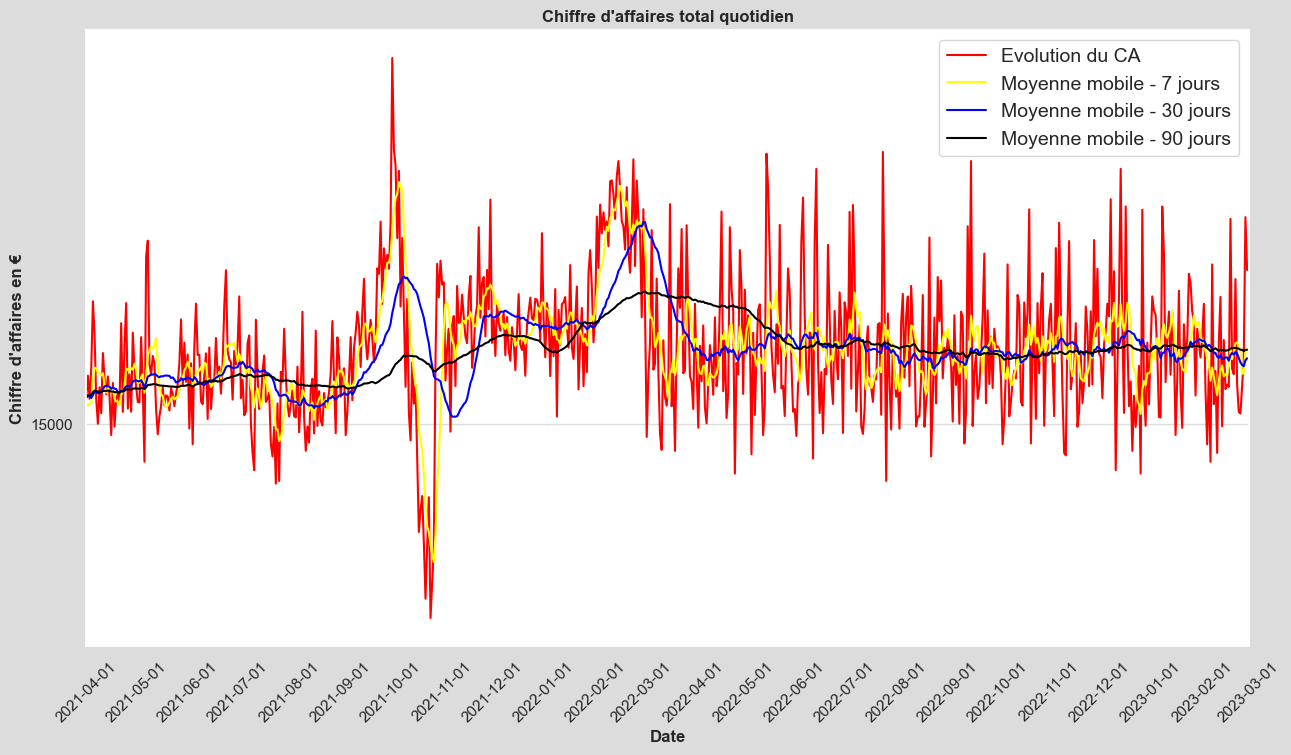

In [50]:
#Evolution du C.A
# Evolution du C.A
sns.set(rc={'figure.figsize':(15,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph9 = sns.lineplot(data=CA_jour, x='date_only', y='CA_jour', color="red", label='Evolution du CA')  # Ventes quotidiennes
graph9.set_title("Chiffre d'affaires total quotidien", fontname='Arial', fontsize=12, fontweight='bold')
plt.xticks(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
            '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
            '2023-01', '2023-02', '2023-03'], rotation=45)
plt.yticks([0,5000,10000,15000])
plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel("Chiffre d'affaires en €", fontweight='bold', fontsize=12)
plt.grid(axis='y', color='gainsboro')

# Tracé des moyennes mobiles avec des couleurs plus adaptées
plt.plot(CA_jour['date_only'], CA_jour['semaine_glissant'], color='yellow', label='Moyenne mobile - 7 jours')  # Vert clair
plt.plot(CA_jour['date_only'], CA_jour['mois_glissant'], color='blue', label='Moyenne mobile - 30 jours')  # Bleu clair
plt.plot(CA_jour['date_only'], CA_jour['trimestre_glissant'], color='black', label='Moyenne mobile - 90 jours')  # Orange clair # Violet clair

# Légende
plt.legend(fontsize=14)

# Sauvegarde et affichage
plt.savefig("courbes_ventes.png", bbox_inches='tight')
plt.show()


L'entreprise connaît une chute importante des vente à partir d'octobre 2021, cette chute ressemble à une chute ponctuelle sur une semaine ou un peu plus, en se basant sur l'évolution des courbes. 

Ca_jour

In [51]:
CA_jour

date_only   CA_jour  semaine_glissant  mois_glissant  trimestre_glissant  \
0   2021-03-01  16565.22      16565.220000   16565.220000        16565.220000   
1   2021-03-02  15486.45      16025.835000   16025.835000        16025.835000   
2   2021-03-03  15198.69      15750.120000   15750.120000        15750.120000   
3   2021-03-04  15196.07      15611.607500   15611.607500        15611.607500   
4   2021-03-05  17471.37      15983.560000   15983.560000        15983.560000   
..         ...       ...               ...            ...                 ...   
725 2023-02-24  15207.89      16488.778571   16238.370333        16494.432889   
726 2023-02-25  15761.25      16006.747143   16188.068333        16494.061111   
727 2023-02-26  16304.72      16035.021429   16162.444333        16467.343667   
728 2023-02-27  19170.81      16487.570000   16282.368000        16494.029667   
729 2023-02-28  18105.15      16513.984286   16321.900000        16493.775667   

     annee_glissant  
0      16565.220000  
1      16025.835000  
2      15750.120000  
3      15611.607500  
4      15983.560000  
..              ...  
725    16487.492722  
726    16477.576139  
727    16474.848056  
728    16487.168944  
729    16493.120944  

[730 rows x 6 columns]

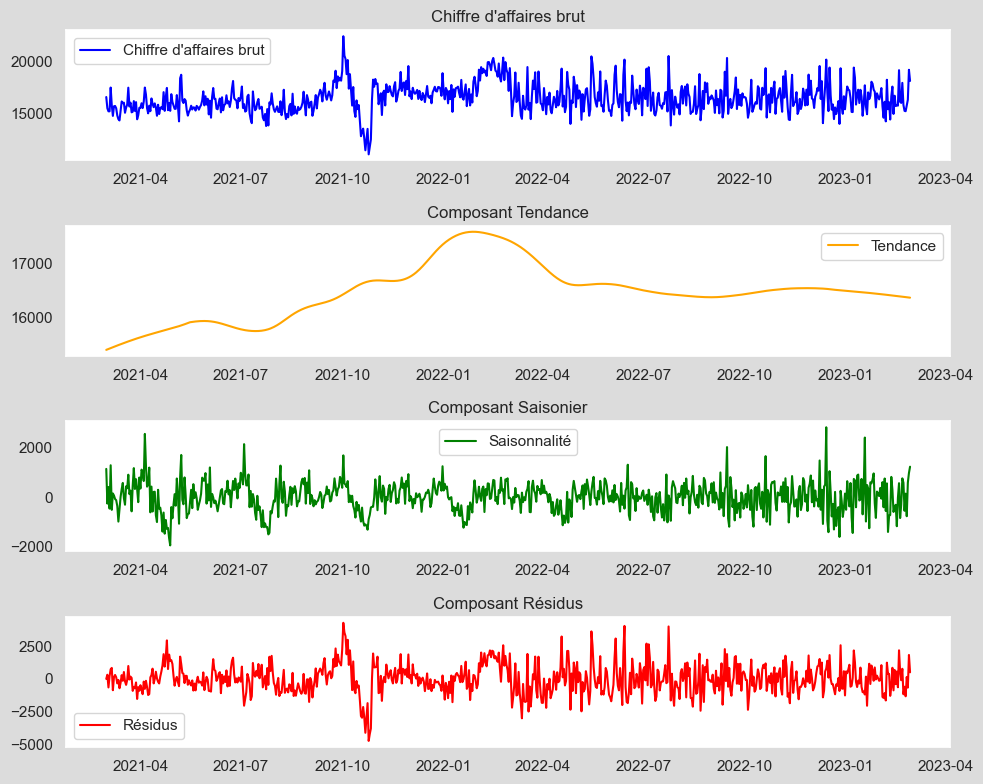

In [52]:
#méthode STL pour décomposer la série temporelle

from statsmodels.tsa.seasonal import STL
CA_jour_stl = CA_jour.copy()
CA_jour_stl.set_index('date_only', inplace=True)

# Application de la décomposition STL sur une fréquence de 30 jours 
stl = STL(CA_jour_stl['CA_jour'], period=90, seasonal=13)
result = stl.fit()

# Extraction des composantes
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualisation des résultats
plt.figure(figsize=(10,8))

plt.subplot(4, 1, 1)
plt.plot(CA_jour_stl.index, CA_jour_stl['CA_jour'], label="Chiffre d'affaires brut", color='blue')
plt.title("Chiffre d'affaires brut")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(CA_jour_stl.index, trend, label="Tendance", color='orange')
plt.title("Composant Tendance")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(CA_jour_stl.index, seasonal, label="Saisonnalité", color='green')
plt.title("Composant Saisonier")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(CA_jour_stl.index, residual, label="Résidus", color='red')
plt.title("Composant Résidus")
plt.legend()

plt.tight_layout()
plt.savefig("mobiles")
plt.show()


In [53]:
#Analyse du C.A par catégorie
CA_jour_cat = merge_global.groupby(['date_only', 'categ'])['price'].sum().reset_index()
CA_jour_cat.rename(columns={'price': 'CA_jour_categorie'}, inplace=True)

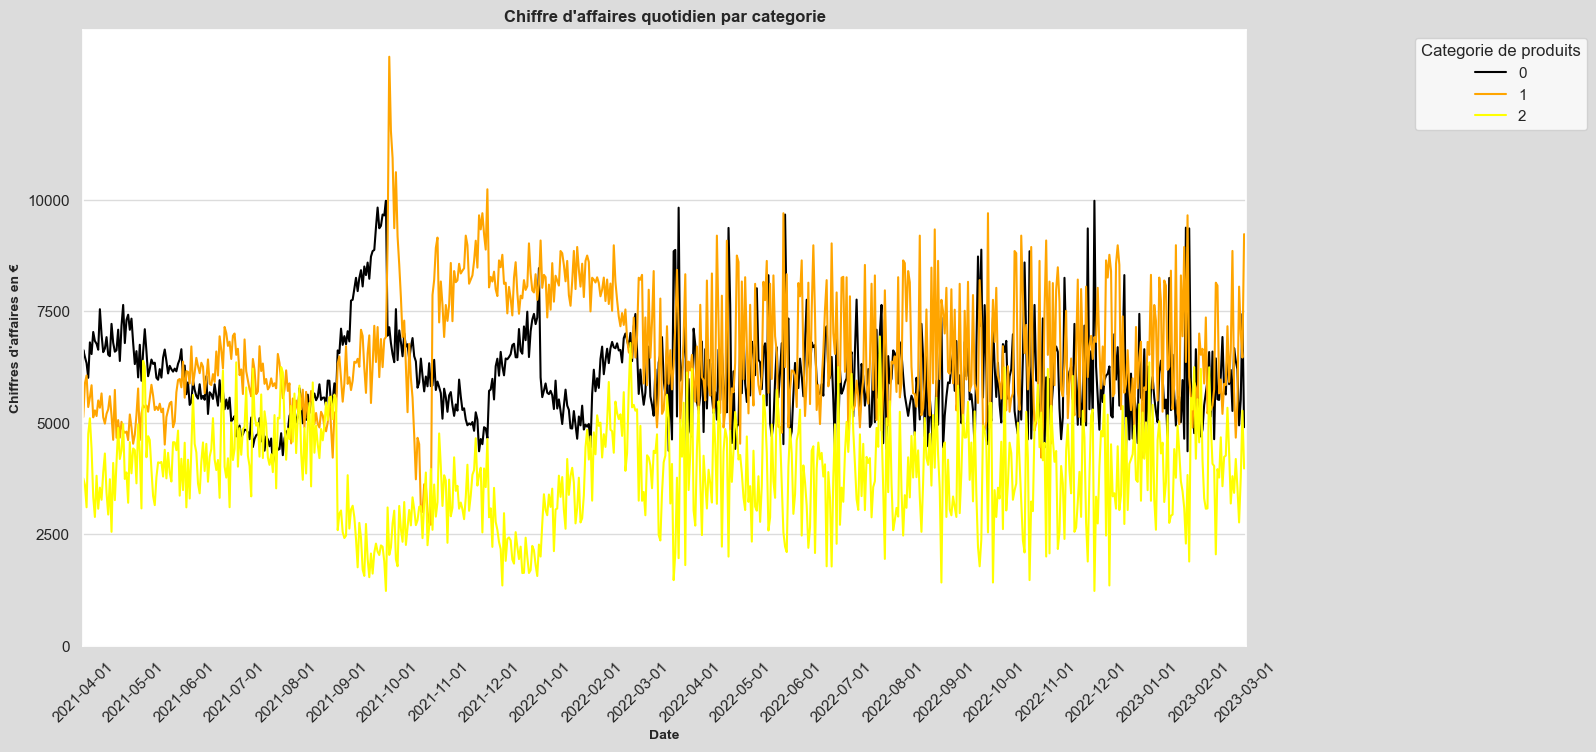

In [54]:
#Analyse du C.A par catégorie
sns.set(rc={'figure.figsize':(15,8),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph10 = sns.lineplot(data=CA_jour_cat, x='date_only', y='CA_jour_categorie',hue='categ',
                      palette=['black', 'orange', 'yellow'])
graph10.set_title("Chiffre d'affaires quotidien par categorie", fontname = 'Arial',fontsize = 12,fontweight = 'bold')
plt.xlabel('Date',fontweight = 'bold' ,fontsize = 10)
sns.move_legend(graph10, "upper right", bbox_to_anchor=(1.3, 1), title='Categorie de produits')
plt.ylabel("Chiffres d'affaires en €",fontweight = 'bold',fontsize = 10)
plt.xticks(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
            '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10',
            '2022-11', '2022-12', '2023-01', '2023-02', '2023-03'], rotation=45)
plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])
plt.yticks([0,2500,5000,7500,10000])
plt.grid(axis='y', color='gainsboro')
plt.savefig("courbes_categories.png", bbox_inches='tight')
plt.show()

Les ventes des produits de categories 0 et 2 semblent negativement correlees. Nous tenterons de verifier numeriquement cette hypothese plus loin.

#### Catégorie 0

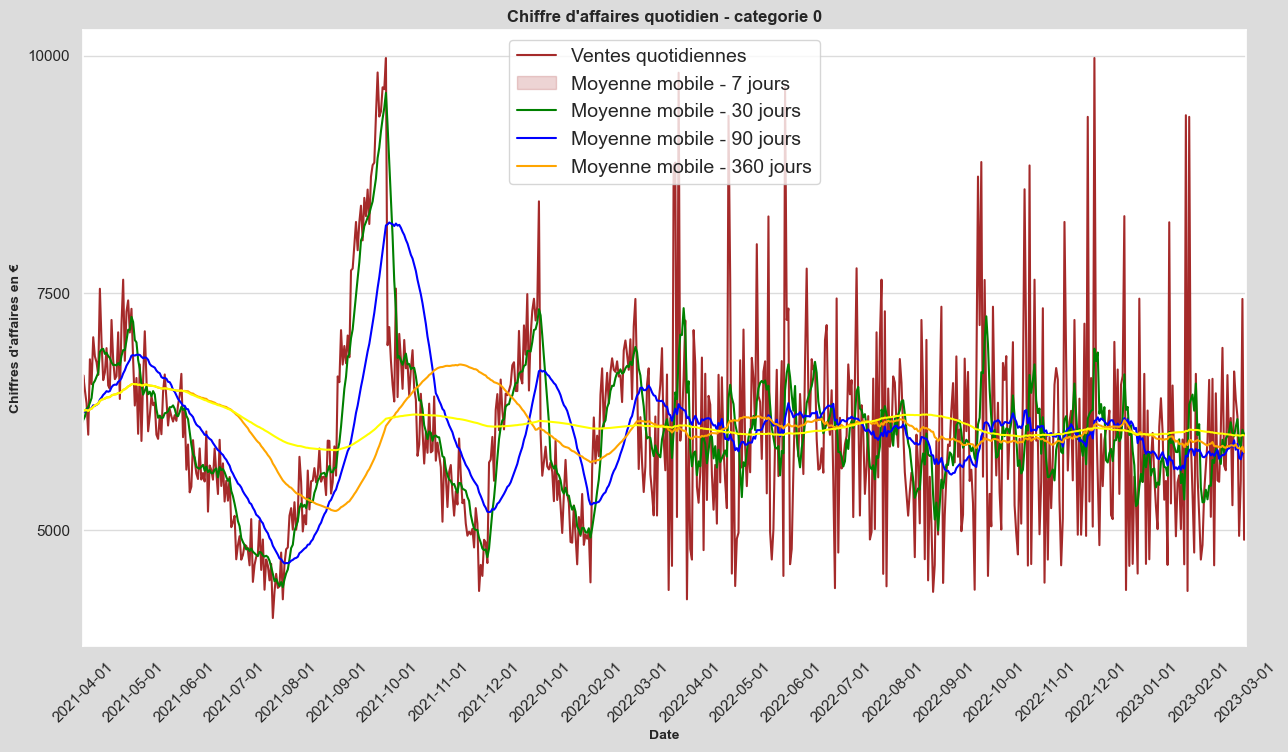

In [55]:
#Création d'un dataframe pour la catégorie 0
CA_jour_cat['categ'] = CA_jour_cat['categ'].astype(str)
CA_jour_cat_0 = CA_jour_cat.loc[CA_jour_cat['categ'] == '0'].copy()

CA_jour_cat_0['semaine_glissant'] = CA_jour_cat_0['CA_jour_categorie'].rolling(7, min_periods=1).mean()
CA_jour_cat_0['mois_glissant'] = CA_jour_cat_0['CA_jour_categorie'].rolling(30, min_periods=1).mean()
CA_jour_cat_0['trimestre_glissant'] = CA_jour_cat_0['CA_jour_categorie'].rolling(90, min_periods=1).mean()
CA_jour_cat_0['annee_glissant'] = CA_jour_cat_0['CA_jour_categorie'].rolling(360, min_periods=1).mean()


CA_jour_cat_0['date_only'] = pd.to_datetime(CA_jour_cat_0['date_only'])

# Création des courbes
sns.set(rc={'figure.figsize':(15,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph11 = sns.lineplot(data=CA_jour_cat_0, x='date_only', y='CA_jour_categorie', color='brown')
graph11.set_title("Chiffre d'affaires quotidien - categorie 0", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Date', fontweight='bold', fontsize=10)
plt.ylabel("Chiffres d'affaires en €", fontweight='bold', fontsize=10)


dates_xticks = pd.to_datetime(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', 
                               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', 
                               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', 
                               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', 
                               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01'])
plt.xticks(dates_xticks, rotation=45)

# Limiter l'axe x
plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])

plt.yticks([0, 2500, 5000, 7500, 10000])
plt.grid(axis='y', color='gainsboro')

plt.plot(CA_jour_cat_0['date_only'], CA_jour_cat_0['semaine_glissant'], color='green')
plt.plot(CA_jour_cat_0['date_only'], CA_jour_cat_0['mois_glissant'], color='blue')
plt.plot(CA_jour_cat_0['date_only'], CA_jour_cat_0['trimestre_glissant'], color='orange')
plt.plot(CA_jour_cat_0['date_only'], CA_jour_cat_0['annee_glissant'], color='yellow')

# Légende
plt.legend(labels=['Ventes quotidiennes', 'Moyenne mobile - 7 jours', 'Moyenne mobile - 30 jours', 
                   'Moyenne mobile - 90 jours', 'Moyenne mobile - 360 jours'], fontsize=14)

# Sauvegarde et affichage
plt.savefig("graph11.png", bbox_inches='tight')
plt.show()


#### Catégorie 1

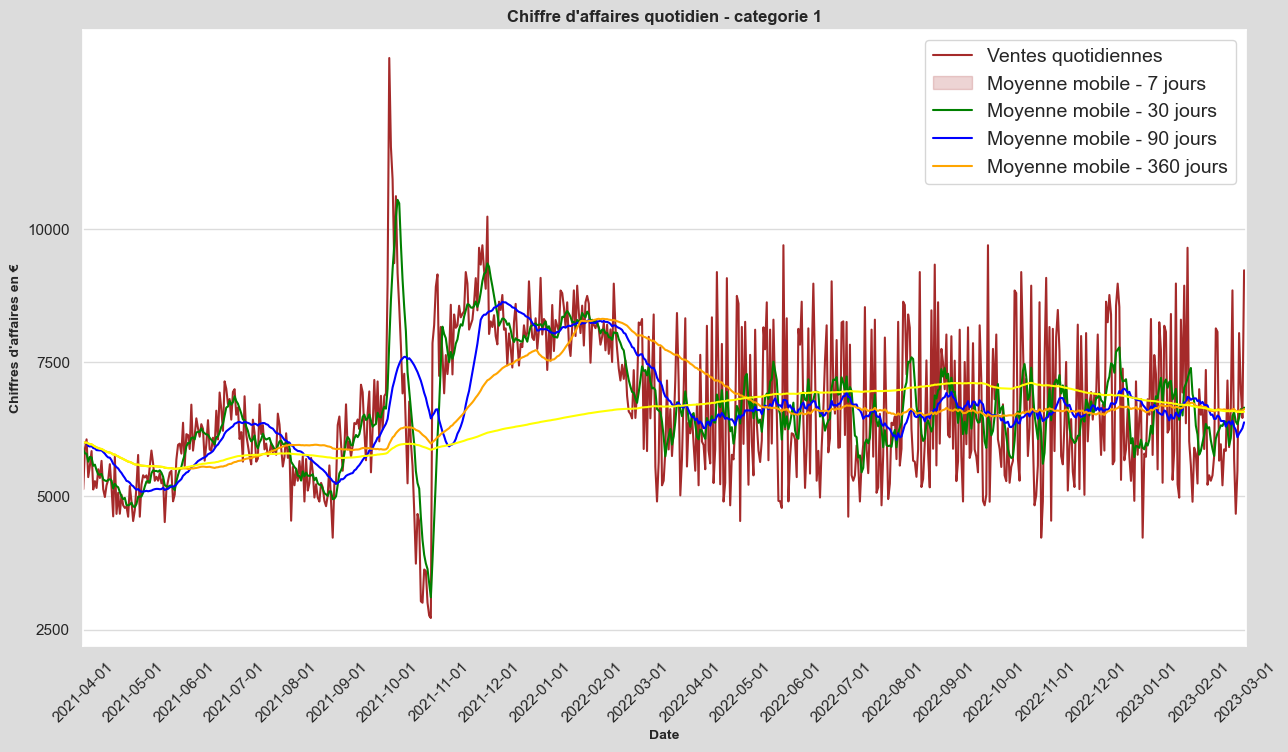

In [56]:
#Création d'un dataframe pour la catégorie 1
CA_jour_cat_1 = CA_jour_cat.loc[CA_jour_cat['categ'] == '1'].copy()

CA_jour_cat_1['semaine_glissant'] = CA_jour_cat_1['CA_jour_categorie'].rolling(7, min_periods=1).mean()
CA_jour_cat_1['mois_glissant'] = CA_jour_cat_1['CA_jour_categorie'].rolling(30, min_periods=1).mean()
CA_jour_cat_1['trimestre_glissant'] = CA_jour_cat_1['CA_jour_categorie'].rolling(90, min_periods=1).mean()
CA_jour_cat_1['annee_glissant'] = CA_jour_cat_1['CA_jour_categorie'].rolling(360, min_periods=1).mean()


CA_jour_cat_1['date_only'] = pd.to_datetime(CA_jour_cat_1['date_only'])

# Création des courbes
sns.set(rc={'figure.figsize':(15,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph11 = sns.lineplot(data=CA_jour_cat_1, x='date_only', y='CA_jour_categorie', color='brown')
graph11.set_title("Chiffre d'affaires quotidien - categorie 1", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Date', fontweight='bold', fontsize=10)
plt.ylabel("Chiffres d'affaires en €", fontweight='bold', fontsize=10)


dates_xticks = pd.to_datetime(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', 
                               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', 
                               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', 
                               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', 
                               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01'])
plt.xticks(dates_xticks, rotation=45)

# Limiter l'axe x
plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])

plt.yticks([0, 2500, 5000, 7500, 10000])
plt.grid(axis='y', color='gainsboro')

plt.plot(CA_jour_cat_1['date_only'], CA_jour_cat_1['semaine_glissant'], color='green')
plt.plot(CA_jour_cat_1['date_only'], CA_jour_cat_1['mois_glissant'], color='blue')
plt.plot(CA_jour_cat_1['date_only'], CA_jour_cat_1['trimestre_glissant'], color='orange')
plt.plot(CA_jour_cat_1['date_only'], CA_jour_cat_1['annee_glissant'], color='yellow')

# Légende
plt.legend(labels=['Ventes quotidiennes', 'Moyenne mobile - 7 jours', 'Moyenne mobile - 30 jours', 
                   'Moyenne mobile - 90 jours', 'Moyenne mobile - 360 jours'], fontsize=14)

# Sauvegarde et affichage
plt.savefig("graph11.png", bbox_inches='tight')
plt.show()


La chute des ventes en octobre est très marquée pour la catégorie 1

#### Catégorie 2

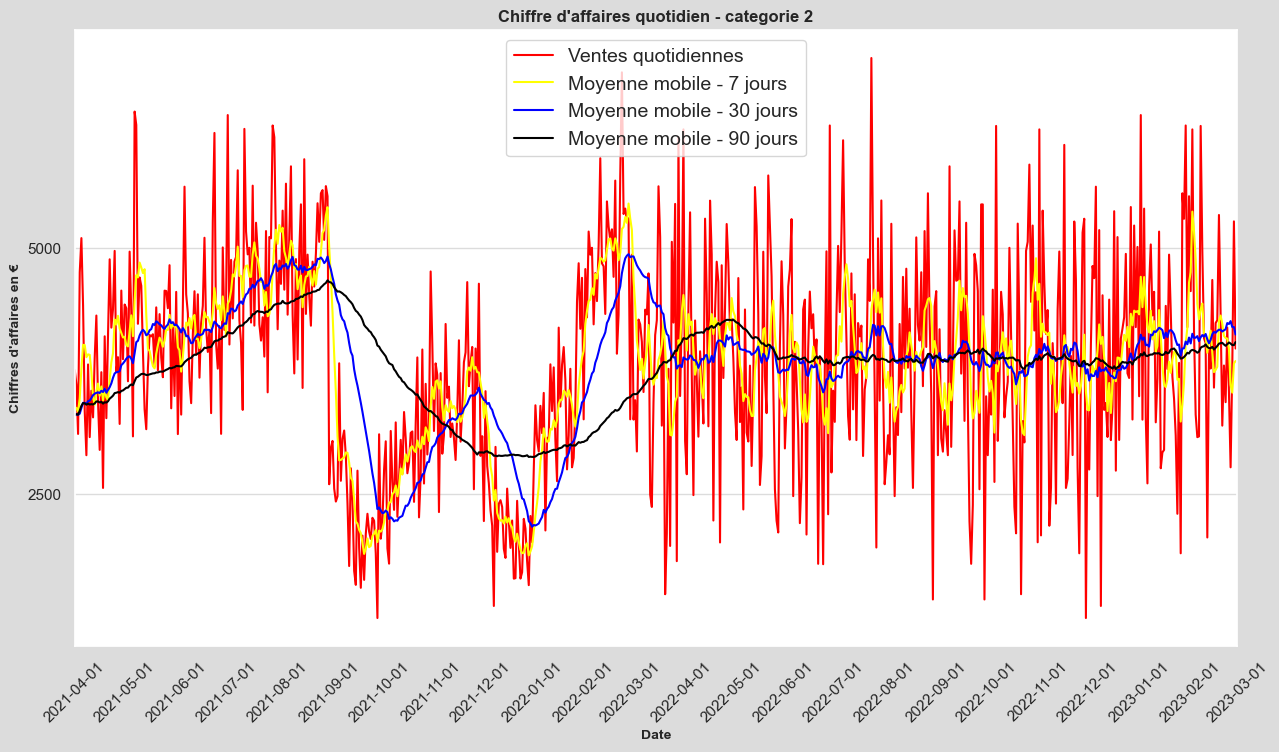

In [57]:
#Création d'un dataframe pour la catégorie 2
CA_jour_cat_2 = CA_jour_cat.loc[CA_jour_cat['categ'] == '2'].copy()

CA_jour_cat_2['semaine_glissant'] = CA_jour_cat_2['CA_jour_categorie'].rolling(7, min_periods=1).mean()
CA_jour_cat_2['mois_glissant'] = CA_jour_cat_2['CA_jour_categorie'].rolling(30, min_periods=1).mean()
CA_jour_cat_2['trimestre_glissant'] = CA_jour_cat_2['CA_jour_categorie'].rolling(90, min_periods=1).mean()
CA_jour_cat_2['annee_glissant'] = CA_jour_cat_2['CA_jour_categorie'].rolling(360, min_periods=1).mean()


CA_jour_cat_2['date_only'] = pd.to_datetime(CA_jour_cat_2['date_only'])

# Création des courbes
# Création des courbes
sns.set(rc={'figure.figsize':(15,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph11 = sns.lineplot(data=CA_jour_cat_2, x='date_only', y='CA_jour_categorie', color='red', label='Ventes quotidiennes')
graph11.set_title("Chiffre d'affaires quotidien - categorie 2", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Date', fontweight='bold', fontsize=10)
plt.ylabel("Chiffres d'affaires en €", fontweight='bold', fontsize=10)

dates_xticks = pd.to_datetime(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', 
                               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', 
                               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', 
                               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', 
                               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01'])
plt.xticks(dates_xticks, rotation=45)

# Limiter l'axe x
plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])

plt.yticks([0, 2500, 5000, 7500, 10000])
plt.grid(axis='y', color='gainsboro')

# Tracé des moyennes mobiles
plt.plot(CA_jour_cat_2['date_only'], CA_jour_cat_2['semaine_glissant'], color='yellow', label='Moyenne mobile - 7 jours')
plt.plot(CA_jour_cat_2['date_only'], CA_jour_cat_2['mois_glissant'], color='blue', label='Moyenne mobile - 30 jours')
plt.plot(CA_jour_cat_2['date_only'], CA_jour_cat_2['trimestre_glissant'], color='black', label='Moyenne mobile - 90 jours')

# Légende
plt.legend(fontsize=14)

# Sauvegarde et affichage
plt.savefig("courbes_ventes.png", bbox_inches='tight')
plt.show()



La catégorie 2 a connu une succesion de deux chutes des ventes : en août 2021 et en décembre 2021

In [58]:
CA_jour_cat.loc[(CA_jour_cat['date_only'] > '2021-10-15') & (CA_jour_cat['categ'] == '1')]

date_only categ  CA_jour_categorie
688  2021-10-16     1            5562.68
691  2021-10-17     1            4720.67
694  2021-10-18     1            3733.90
697  2021-10-19     1            4663.71
700  2021-10-20     1            4521.28
...         ...   ...                ...
2176 2023-02-24     1            5471.07
2179 2023-02-25     1            8050.61
2182 2023-02-26     1            7009.09
2185 2023-02-27     1            6461.76
2188 2023-02-28     1            9226.25

[501 rows x 3 columns]

Le déclin des ventes est particulièrement observables pour la catégorie 1 à partir du 15 octobre

In [59]:
CA_jour_cat.loc[(CA_jour_cat['date_only'] > '2021-10-15')]

date_only categ  CA_jour_categorie
687  2021-10-16     0            6898.14
688  2021-10-16     1            5562.68
689  2021-10-16     2            3330.88
690  2021-10-17     0            6492.60
691  2021-10-17     1            4720.67
...         ...   ...                ...
2185 2023-02-27     1            6461.76
2186 2023-02-27     2            5271.62
2187 2023-02-28     0            4901.86
2188 2023-02-28     1            9226.25
2189 2023-02-28     2            3977.04

[1503 rows x 3 columns]

### Analyse univariée

#### Produits

In [60]:
merge_global

id_prod                       date session_id client_id  date_only  \
0          0_0 2021-03-01 13:45:51.575117      s_282    c_5152 2021-03-01   
1          0_0 2021-03-02 06:42:55.351333      s_621    c_2917 2021-03-02   
2          0_0 2021-03-02 18:49:49.651862      s_852    c_3988 2021-03-02   
3          0_0 2021-03-02 21:57:33.862118      s_908    c_1004 2021-03-02   
4          0_0 2021-03-03 23:59:48.997483     s_1379     c_278 2021-03-03   
...        ...                        ...        ...       ...        ...   
687550    2_99 2022-05-21 01:53:46.967570   s_211661    c_5828 2022-05-21   
687551    2_99 2022-07-21 01:53:46.967570   s_241374    c_5828 2022-07-21   
687552    2_99 2022-11-11 20:56:49.820935   s_296127    c_7135 2022-11-11   
687553    2_99 2022-12-11 20:56:49.820935   s_310606    c_7135 2022-12-11   
687554    2_99 2023-01-21 01:53:46.967570   s_329932    c_5828 2023-01-21   

        price  categ sex   birth   age  
0        3.75      0   f  1986.0  39.0  
1        3.75      0   m  1988.0  37.0  
2        3.75      0   f  1962.0  63.0  
3        3.75      0   m  1973.0  52.0  
4        3.75      0   f  1987.0  38.0  
...       ...    ...  ..     ...   ...  
687550  84.99      2   f  1998.0  27.0  
687551  84.99      2   f  1998.0  27.0  
687552  84.99      2   m  1996.0  29.0  
687553  84.99      2   m  1996.0  29.0  
687554  84.99      2   f  1998.0  27.0  

[687555 rows x 10 columns]

In [61]:
# Analyse univariée
CA_val = merge_global.groupby(['id_prod', 'categ']).agg({'session_id' : ['count'], 'price' : ['sum']}).reset_index()
CA_val.rename(columns={'price' : 'CA_Total', 'session_id' : 'nb_ventes'}, inplace=True)

CA_val.sort_values(('CA_Total', 'sum'), inplace=True, ascending=True)
n = len(CA_val)
CA_val['CA_Total_cum'] = np.cumsum(CA_val['CA_Total'])
gini = (n + 1 - 2 * CA_val['CA_Total_cum'].sum() / CA_val['CA_Total_cum'].iloc[-1]) / n
print(f"Indice de Gini : {gini}")

Indice de Gini : 0.7455288207280044


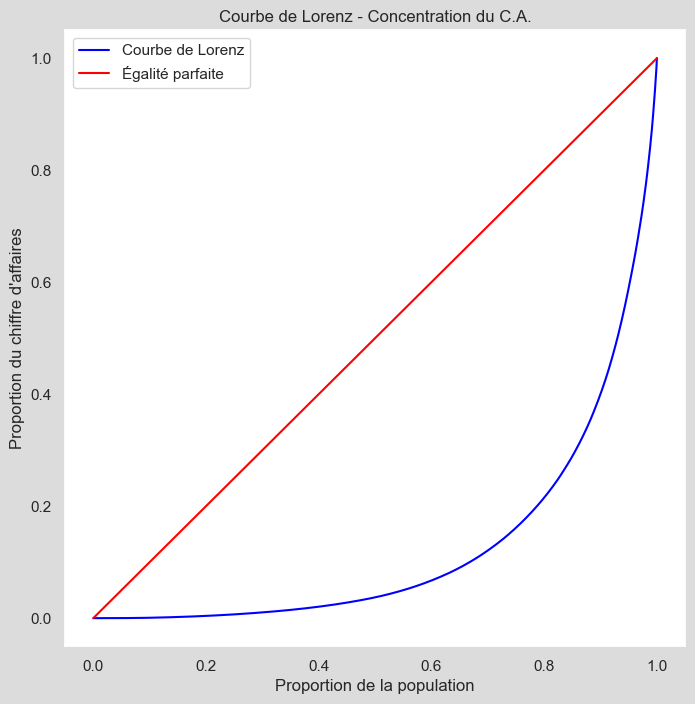

In [62]:
CA_val['prod_cum'] = (np.arange(1, len(CA_val) + 1)) / len(CA_val)
CA_val['valeurs_cum'] = CA_val['CA_Total'].cumsum() / CA_val['CA_Total'].sum()
# Étape 3: Tracer la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(CA_val['prod_cum'], CA_val['valeurs_cum'], color='blue', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='red', label='Égalité parfaite')  # Ligne d'égalité parfaite
plt.xlabel('Proportion de la population')
plt.ylabel('Proportion du chiffre d\'affaires')
plt.title('Courbe de Lorenz - Concentration du C.A.')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

 L'indice de Gini est tres eleve (0.74), ce qui revele une distribution tres inegalitaire du chiffre d'affaires sur notre gamme de produits. 80% des produits vendus ne nous permettent de realiser qu'un peu plus de 20% de notre chiffre d'affaires et ils faut plus de 90% des produits vendus pour atteindre le CA medial. Une répartition inégalitaire des ventes des produits est très courante pour les boutiques en ligne. Ce phénomène suit généralement le principe de Pareto (ou la règle des 80/20), qui stipule que 20 % des produits génèrent 80 % des ventes.

#### Répartition des ventes en valeur par catégorie

In [63]:
#Regroupement des ventes par catégorie
merge_categ = merge_global.groupby('categ').agg({'id_prod' : ['count', 'nunique'], 'price' : ['sum', 'mean']}).reset_index()

In [64]:
#Renommage des colonnes
merge_categ.rename(columns={'count':'produits vendus', 'nunique': 'nb de refs', 'sum':'CA total',
                               'mean':'prix moyen'}, inplace=True)


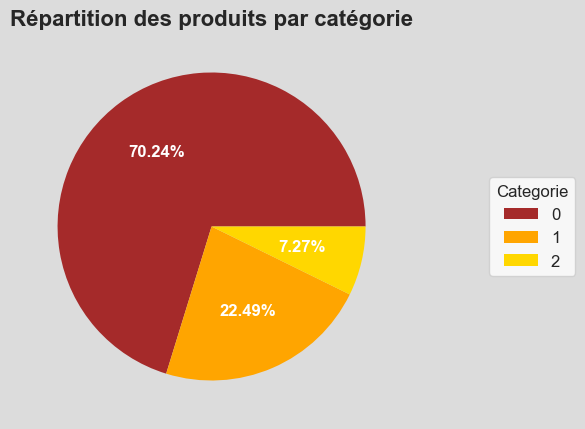

In [65]:
# Répartition des produits par catégorie
fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor('gainsboro')
graph_cat_prod = plt.pie(merge_categ[("id_prod", "nb de refs")], autopct='%1.2f%%', pctdistance=0.6, radius=1,
                   colors=('brown', 'orange', 'gold'), textprops={'fontsize': 12, 'color':'white', 'fontweight':'bold'},
                   wedgeprops={'alpha':1, 'linewidth': 0})
ax.legend(merge_categ["categ"], title="Categorie", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("Répartition des produits par catégorie", loc="center", fontsize=16, fontweight='bold')
plt.savefig("graph15.png", bbox_inches='tight')
plt.show()

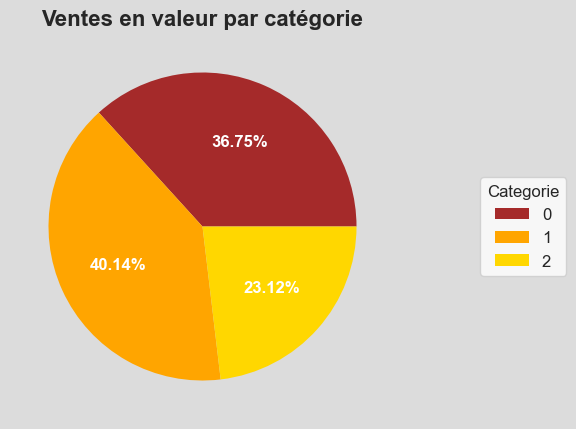

In [66]:
# Ventes en valeur
fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor('gainsboro')
graph_cat_val = plt.pie(merge_categ[("price", "CA total")], autopct='%1.2f%%', pctdistance=0.6, radius=1,
                   colors=('brown', 'orange', 'gold'), textprops={'fontsize': 12, 'color':'white', 'fontweight':'bold'},
                   wedgeprops={'alpha':1, 'linewidth': 0})
ax.legend(merge_categ["categ"], title="Categorie", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("Ventes en valeur par catégorie", loc="center", fontsize=16, fontweight='bold')
plt.savefig("ventes_cat_valeur.png", bbox_inches='tight')
plt.show()

La repartition du CA par catégorie est inegalitaire: les produits de cat 0 representent plus de 70% de notre catalogue mais seulement 27% du C.A


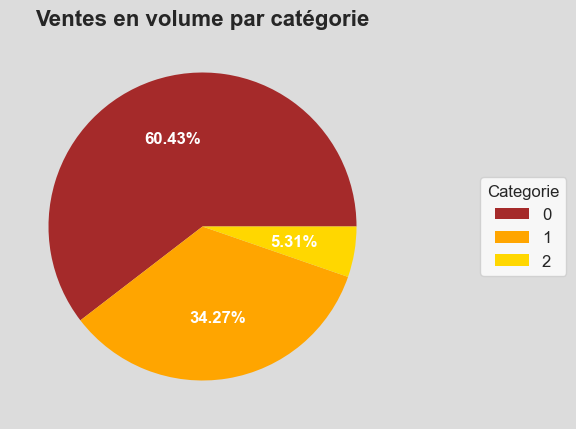

In [67]:
# Ventes en valeur
fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor('gainsboro')
graph_cat_vol = plt.pie(merge_categ[("id_prod", "produits vendus")], autopct='%1.2f%%', pctdistance=0.6, radius=1,
                   colors=('brown', 'orange', 'gold'), textprops={'fontsize': 12, 'color':'white', 'fontweight':'bold'},
                   wedgeprops={'alpha':1, 'linewidth': 0})
ax.legend(merge_categ["categ"], title="Categorie", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("Ventes en volume par catégorie", loc="center", fontsize=16, fontweight='bold')
plt.savefig("ventes_cat_volume.png", bbox_inches='tight')
plt.show()

In [68]:
#On groupe les ventes par produits pour analyser les tops et les flops

produits = merge_global['id_prod'].unique().tolist()

merge_global_comp_produit = merge_global.groupby('id_prod').agg({'session_id': 'count'}).reset_index()

merge_global_comp_produit = merge_global_comp_produit.set_index('id_prod').reindex(produits, fill_value=0).reset_index()

merge_global_comp_produit = merge_global_comp_produit.rename(columns={'index': 'id_prod'})

merge_global_comp_produit

id_prod  session_id
0        0_0        1242
1        0_1         487
2       0_10          22
3      0_100           3
4     0_1000         432
...      ...         ...
3281    2_95           4
3282    2_96         598
3283    2_97          13
3284    2_98           1
3285    2_99           7

[3286 rows x 2 columns]

In [69]:
top_produits = merge_global_comp_produit.sort_values(by='session_id', ascending=False).head(10)
top_produits

id_prod  session_id
2608   1_369        2340
2662   1_417        2269
2659   1_414        2246
2751   1_498        2202
2671   1_425        2163
2647   1_403        2040
2658   1_413        2036
2657   1_412        2014
2650   1_406        2003
2651   1_407        2001

In [70]:
flop_produits = merge_global_comp_produit.sort_values(by='session_id', ascending=True).head(10)
flop_produits

id_prod  session_id
21    0_1016           0
692   0_1620           0
696   0_1624           0
1557   0_322           0
2308     1_0           0
31    0_1025           0
1544   0_310           0
1530   0_299           0
356   0_1318           0
719   0_1645           0

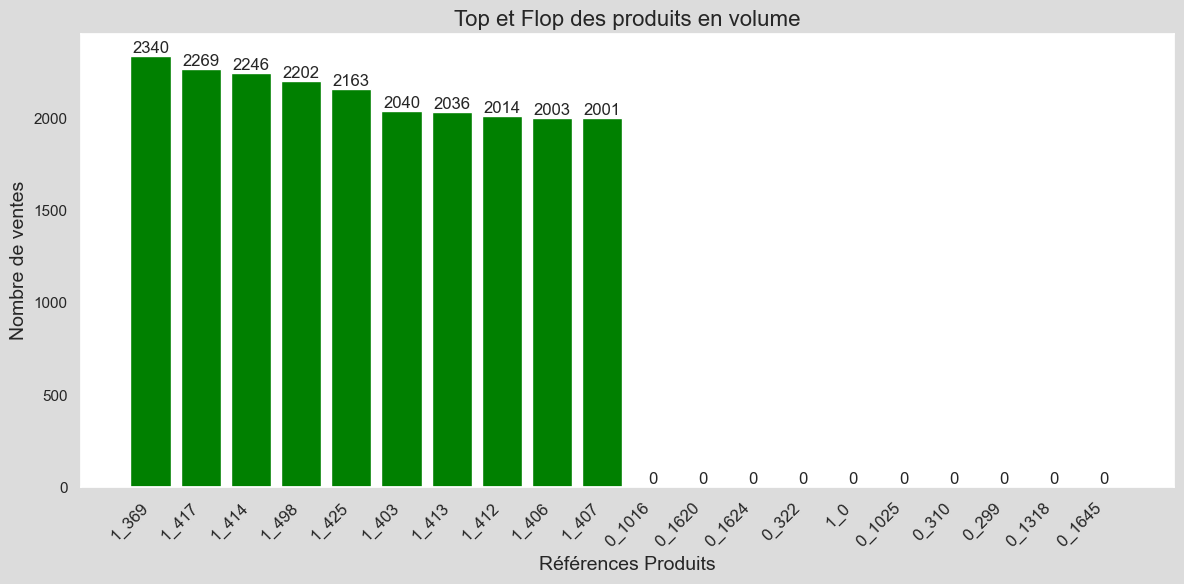

In [71]:
#Graphique combiné des top et flop 

top_flop_produits = pd.concat([top_produits, flop_produits])

# Créer un graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(top_flop_produits['id_prod'], top_flop_produits['session_id'], color=['green']*len(top_produits) + ['red']*len(flop_produits))

# Ajout des valeurs sur chaque barre
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Configuration du graphique
plt.title("Top et Flop des produits en volume", fontsize=16)
plt.xlabel("Références Produits", fontsize=14)
plt.ylabel("Nombre de ventes", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage
plt.savefig("top_flop.png", bbox_inches='tight')
plt.show()

Les produits connaissant le plus de succès sont essentiellement des produits de la catégorie 1, tandis que les produits connaissant le moins de succès sont uniquement des produits de la catégorie 0.

#### Analyse univariée des clients

In [72]:
customers

client_id sex  birth  age
0       c_4410   f   1967   58
1       c_7839   f   1975   50
2       c_1699   f   1984   41
3       c_5961   f   1962   63
4       c_5320   m   1943   82
...        ...  ..    ...  ...
8616    c_7920   m   1956   69
8617    c_7403   f   1970   55
8618    c_5119   m   1974   51
8619    c_5643   f   1968   57
8620      c_84   f   1982   43

[8621 rows x 4 columns]

In [73]:
#Regroupement de la table customers par genre
genre_pie = customers.groupby(['sex'])['client_id'].count().reset_index()

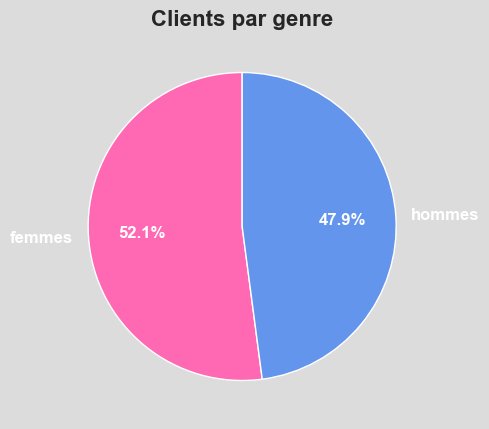

In [74]:
#Diagramme des clients par genre
fig, ax = plt.subplots(figsize=(5,5))
fig.set_facecolor('gainsboro')
colors_GR17 = ['hotpink','cornflowerblue']
ax.pie(genre_pie['client_id'], radius=1, colors = ['hotpink','cornflowerblue'], labels=['femmes','hommes'], autopct='%1.1f%%', pctdistance=0.65, textprops={'fontsize': 12, 'color':'white','fontweight':'bold'}, startangle=90)
ax.set_title("Clients par genre", loc="center", fontsize=16, fontweight='bold')
plt.savefig("genre_pie.png", bbox_inches='tight')
plt.show()

On constate que la repartition hommes/femmes est presque égalitaire.
Faisons segmentation de nos clients en fonction du nombre de livres lus par an pour distinguer.

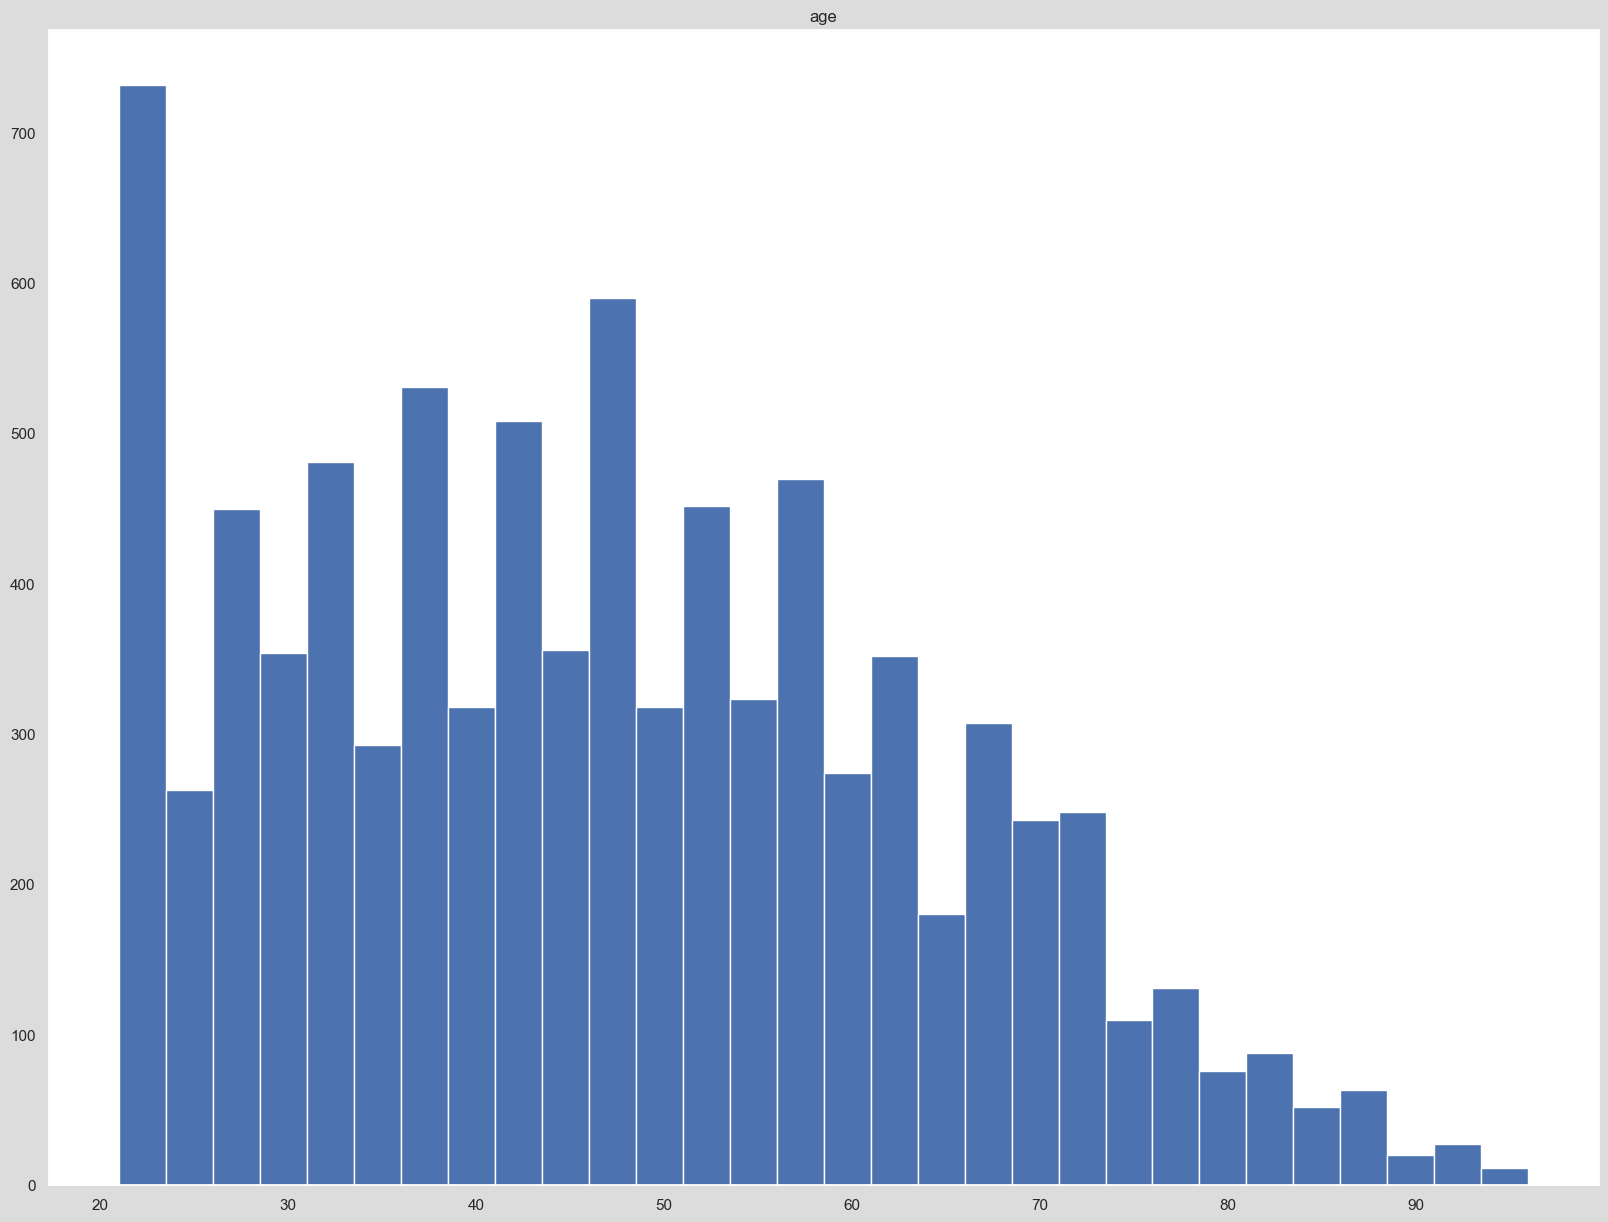

In [75]:
# Distribution de la variable âge
customers.hist('age', bins=30, figsize=(20, 15))
plt.show()

In [76]:
#Regroupement par clients
merge_global_comp = merge_global.groupby(['client_id']).agg({'price': ['sum'], 'session_id' : ['count']}).reset_index()

In [77]:
#Renommage des colonnes
merge_global_comp.rename(columns = {'price' : 'montant depense', 'session_id' : 'nombre achats'}, inplace=True)
#Création de catégories de lecteurs
merge_global_comp = merge_global_comp.copy()
merge_global_comp['livres_par_an'] = merge_global_comp[('nombre achats', 'count')]/2
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 0)
                & (merge_global_comp[('nombre achats', 'count')] <= 5), 'type_lecteur'] = "Petits lecteurs"
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 5)
                & (merge_global_comp[('nombre achats', 'count')] <= 20), 'type_lecteur'] = "Lecteurs standards"
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 20)
                & (merge_global_comp[('nombre achats', 'count')] <= 52), 'type_lecteur'] = "Grands lecteurs"
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 52)
                & (merge_global_comp[('nombre achats', 'count')] <= 104), 'type_lecteur'] = "Tres grands lecteurs"
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 104)
                & (merge_global_comp[('nombre achats', 'count')] <= 1000), 'type_lecteur'] = "Collectionneurs"
merge_global_comp.loc[(merge_global_comp[('nombre achats', 'count')] > 1000), 'type_lecteur'] = "Clients professionnels"

merge_global_comp_type = pd.DataFrame(merge_global_comp.groupby(( 'client_id',      '')).agg(
    {(    'type_lecteur',      ''): 'first'})).reset_index()

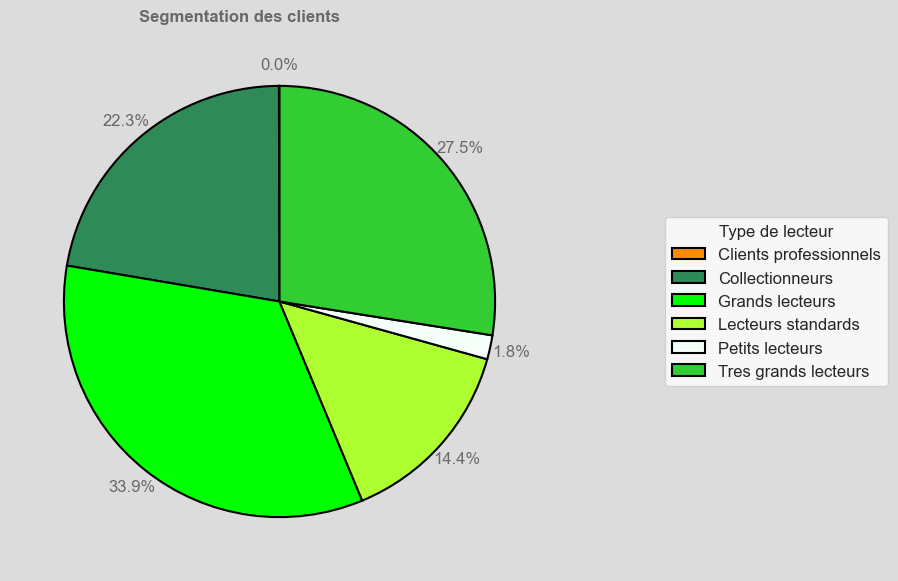

In [78]:
#Diagramme représentant la répartition  des clients selon le type de lecteurs
type_counts = merge_global_comp_type["type_lecteur"].value_counts()
labels = type_counts.index
explode = [0.1 if label in ["Professionnels"] else 0 for label in labels]
fig, ax = plt.subplots(figsize=(7,7))
fig.set_facecolor('gainsboro')
ax.pie(merge_global_comp_type.groupby(['type_lecteur'], sort=True)['client_id'].count(), radius=1,
      colors=['darkorange','seagreen','lime','greenyellow','mintcream', 'limegreen'], autopct='%1.1f%%', pctdistance=1.1,
       wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, explode = explode, textprops={'fontsize': 12, 'color':'dimgray'}, startangle=90)
ax.legend(merge_global_comp_type['type_lecteur'].drop_duplicates().sort_values(), title="Type de lecteur", loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12)

leg = ax.get_legend()

#adding title inside the plot
plt.text(-0.65, 1.3, "Segmentation des clients", fontsize=12, fontweight='bold', color='dimgray')

plt.savefig("diagramme_segmentation.png", bbox_inches='tight')
plt.show()

In [79]:
merge_global_comp_type.loc[merge_global_comp_type['type_lecteur']== 'Clients professionnels']

client_id            type_lecteur
                                      
677     c_1609  Clients professionnels
2724    c_3454  Clients professionnels
4388    c_4958  Clients professionnels
6337    c_6714  Clients professionnels

Il n'y a que 4 clients professionnels dans l'historique des ventes

In [80]:
#Calculons le nombre de clients selon le type de lecteurs

merge_global_comp_type_2 = merge_global_comp.groupby('type_lecteur').agg({
    ('montant depense', 'sum'): 'sum',
    ('nombre achats', 'count'): 'sum',
})
merge_global_comp_type_2 = merge_global_comp_type_2.reset_index()
merge_global_comp_type_2['Part du CA en volume'] = round(merge_global_comp_type_2['nombre achats']/merge_global_comp['nombre achats'].sum()*100, 2)
merge_global_comp_type_2['Part du CA en valeur'] = round(merge_global_comp_type_2['montant depense']/merge_global_comp['montant depense'].sum()*100, 2)
merge_global_comp_type_2.sort_values(("montant depense", "sum"), inplace=True, ascending=False)
merge_global_comp_type_2.rename(columns={'nombre achats': 'nb_achats'}, inplace=True)
merge_global_comp_type_2

type_lecteur montant depense nb_achats Part du CA en volume  \
                                      sum     count                        
1         Collectionneurs      4748879.58    343925                50.02   
5    Tres grands lecteurs      3296377.07    175406                25.51   
2         Grands lecteurs      2586069.01    103958                15.12   
0  Clients professionnels       884296.09     46800                 6.81   
3      Lecteurs standards       491974.47     16884                 2.46   
4         Petits lecteurs        20066.88       561                 0.08   

  Part du CA en valeur  
                        
1                39.48  
5                27.41  
2                21.50  
0                 7.35  
3                 4.09  
4                 0.17

Les clients professionnels occupent 7% du C.A global

In [81]:
merge_global_comp_type_2

type_lecteur montant depense nb_achats Part du CA en volume  \
                                      sum     count                        
1         Collectionneurs      4748879.58    343925                50.02   
5    Tres grands lecteurs      3296377.07    175406                25.51   
2         Grands lecteurs      2586069.01    103958                15.12   
0  Clients professionnels       884296.09     46800                 6.81   
3      Lecteurs standards       491974.47     16884                 2.46   
4         Petits lecteurs        20066.88       561                 0.08   

  Part du CA en valeur  
                        
1                39.48  
5                27.41  
2                21.50  
0                 7.35  
3                 4.09  
4                 0.17

Analysons désormais le profil de nos clients en fonction, de leur montant dépensé

In [82]:
merge_global_comp = merge_global_comp.sort_values(by=('montant depense', 'sum'))
merge_global_comp['client_cumule'] = np.arange(1, len(merge_global_comp) + 1) / len(merge_global_comp)
merge_global_comp['montant_cumule'] = merge_global_comp['montant depense', 'sum'].cumsum() / merge_global_comp['montant depense', 'sum'].sum()

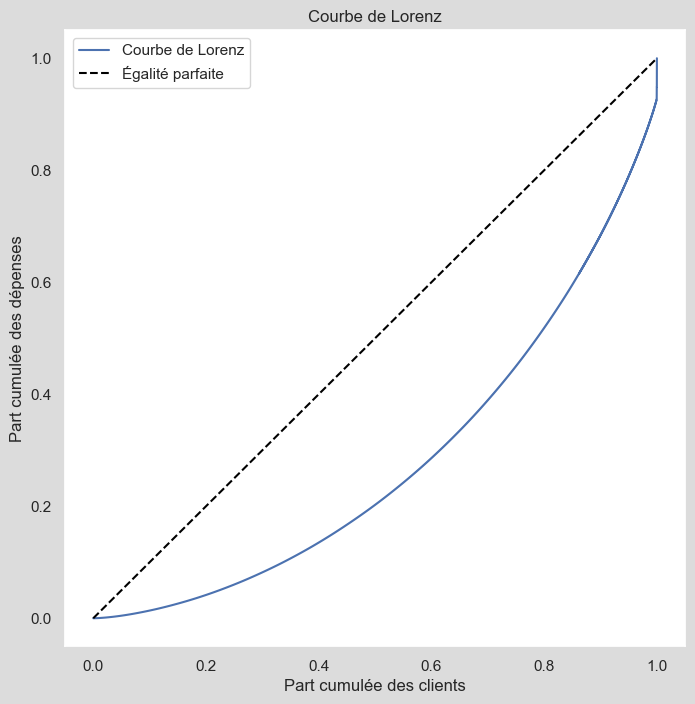

In [83]:
x = np.insert(merge_global_comp['client_cumule'].values, 0, 0) 
y = np.insert(merge_global_comp['montant_cumule'].values, 0, 0) 
plt.figure(figsize=(8, 8))
plt.plot(x, y, drawstyle='steps-post', label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Égalité parfaite")
plt.title("Courbe de Lorenz")
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée des dépenses")
plt.legend()
plt.grid()
plt.savefig("Lorenz_repartition_ca.png", bbox_inches='tight')
plt.show()

In [84]:
#Indice de GINI
AUC = np.trapz(y, x) 
gini = 1 - 2 * AUC
print(f"Indice de Gini : {gini:.2f}")

Indice de Gini : 0.44


Une partie significative des revenus provient d’un petit pourcentage de clients.

In [85]:
#Calculons maintenant le nombre de clients par mois
merge_global.loc[:, 'mois'] = merge_global['date_only'].dt.to_period('M')

# Extraction de l'année et du mois
merge_global = merge_global.dropna(subset=['date_only'])
merge_global['mois'] = merge_global['date_only'].dt.to_period('M')

# Grouper les données par année et mois, et compter le nombre de clients
merge_global_comp_mois = pd.DataFrame(merge_global.groupby('mois').agg(
    {'client_id': 'nunique'})).reset_index()

# Affichage des résultats
print(merge_global_comp_mois)

       mois  client_id
0   2021-03       5676
1   2021-04       5674
2   2021-05       5644
3   2021-06       5659
4   2021-07       5672
..      ...        ...
19  2022-10       5755
20  2022-11       5749
21  2022-12       5765
22  2023-01       5828
23  2023-02       5587

[24 rows x 2 columns]


C:\Users\julie\AppData\Local\Temp\ipykernel_22716\3959067526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_global['mois'] = merge_global['date_only'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

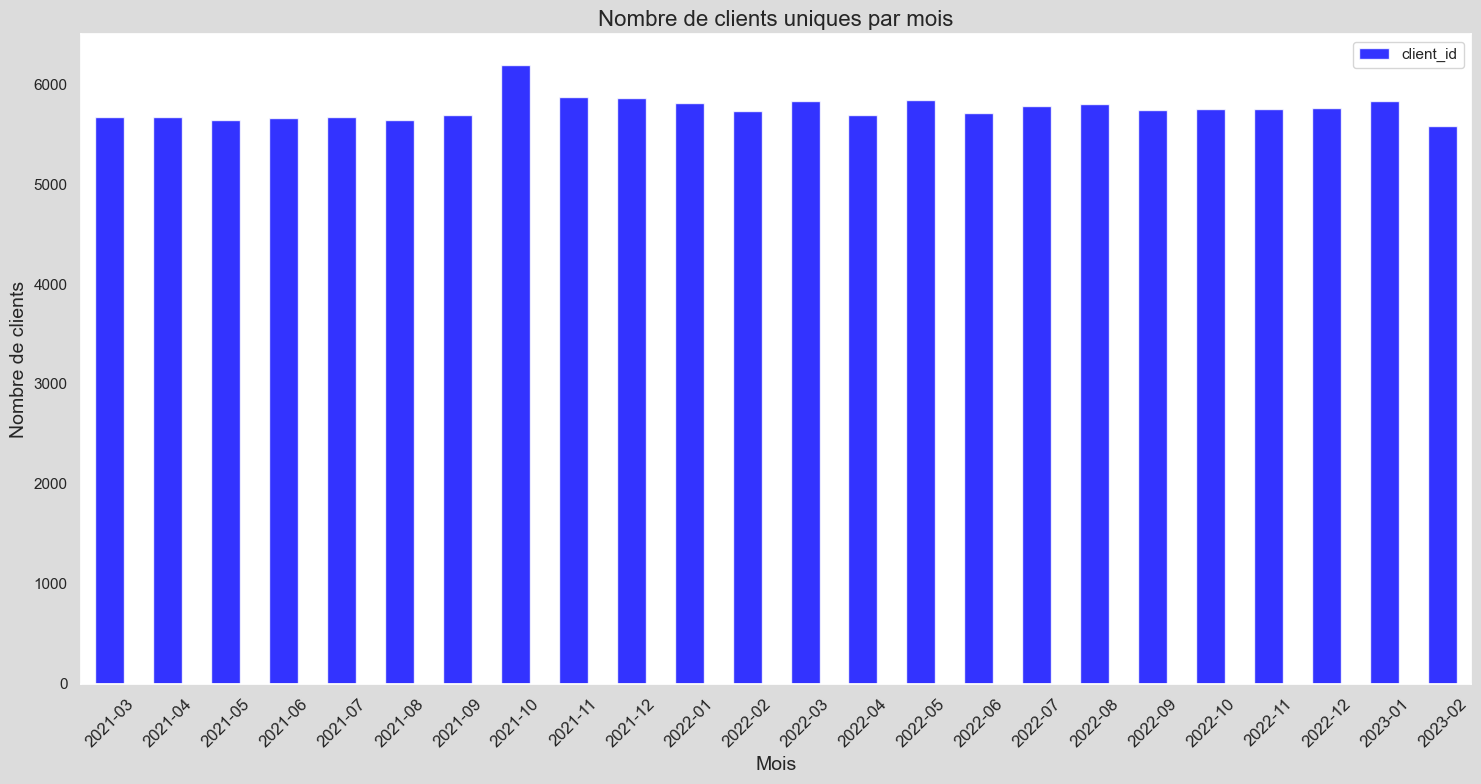

In [86]:
merge_global_comp_mois.set_index('mois', inplace=True)

# Création du graphique
plt.figure(figsize=(10, 6))

# Graphique en barres
merge_global_comp_mois.plot(kind='bar', color='blue', alpha=0.8)

# Forcer les étiquettes des ticks
plt.xticks(
    ticks=range(len(merge_global_comp_mois)),  # Index des positions
    labels=merge_global_comp_mois.index,       # Noms des mois (YYYY-MM)
    rotation=45,
    fontsize=12
)

# Configuration du graphique
plt.title("Nombre de clients uniques par mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Nombre de clients", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage
plt.savefig("nombre_client_mois.png", bbox_inches='tight')
plt.show()

In [87]:
#Nombre de transactions par mois
merge_global_comp_mois_transac = pd.DataFrame(merge_global.groupby('mois').agg(
    {'session_id' : 'nunique'})).reset_index()
merge_global_comp_mois_transac

mois  session_id
0   2021-03       14201
1   2021-04       13970
2   2021-05       14168
3   2021-06       13838
4   2021-07       13571
..      ...         ...
19  2022-10       14658
20  2022-11       14224
21  2022-12       14634
22  2023-01       14758
23  2023-02       13073

[24 rows x 2 columns]

<Figure size 1000x600 with 0 Axes>

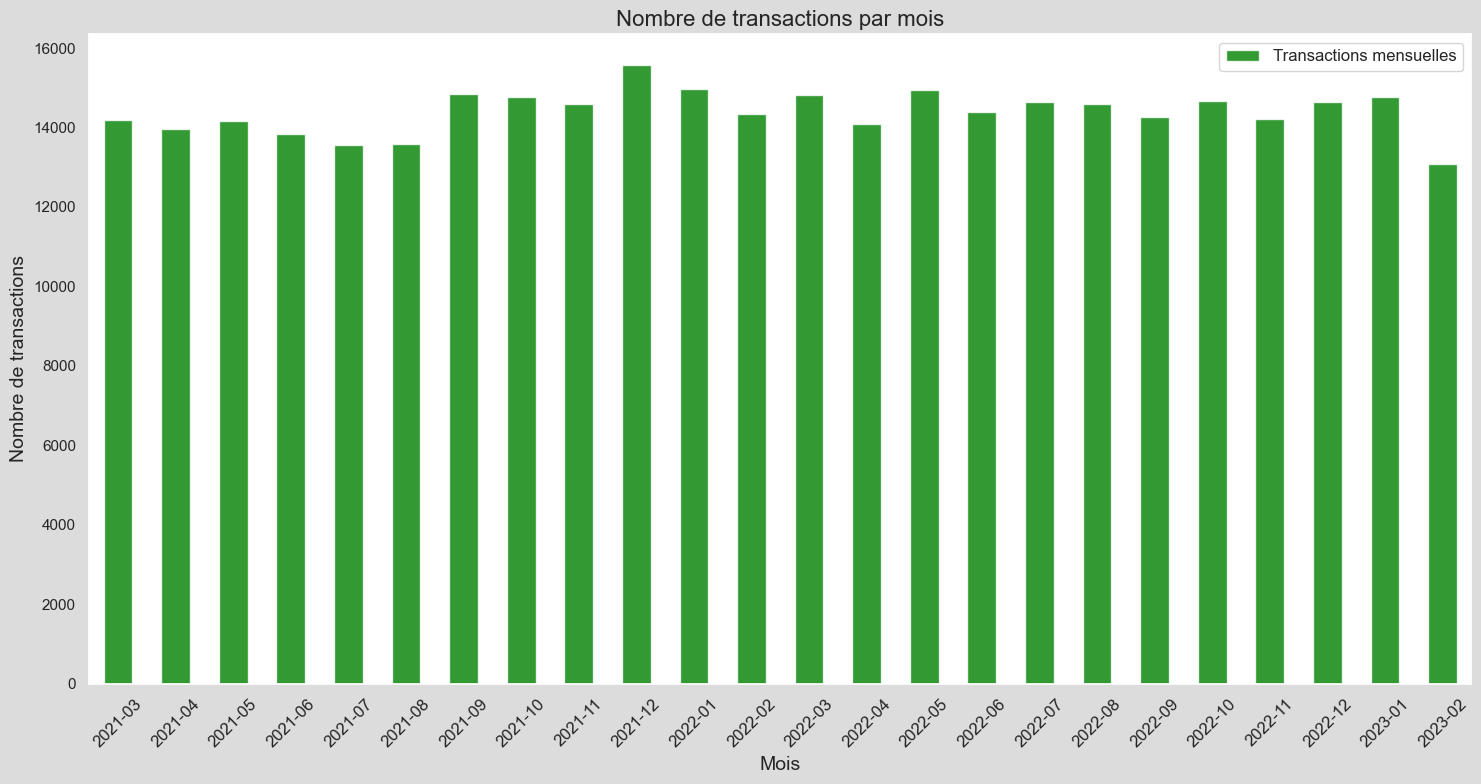

In [88]:
merge_global_comp_mois_transac.set_index('mois', inplace=True)

# Création du graphique
plt.figure(figsize=(10, 6))

# Graphique en barres
merge_global_comp_mois_transac.plot(kind='bar', color='green', alpha=0.8)

# Forcer les étiquettes des ticks
plt.xticks(
    ticks=range(len(merge_global_comp_mois_transac)),  
    labels=merge_global_comp_mois_transac.index,       
    rotation=45,
    fontsize=12
)

# Configuration du graphique
plt.title("Nombre de transactions par mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Nombre de transactions", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(['Transactions mensuelles'], fontsize=12, loc='upper right')
# Affichage
plt.savefig('nombre_transactions_mois.png', bbox_inches='tight')
plt.show()

In [89]:
#Nombre de produits par mois
merge_global_comp_mois_produit = pd.DataFrame(merge_global.groupby('mois').agg(
    {'id_prod' : 'count'})).reset_index()
merge_global_comp_mois_produit

mois  id_prod
0   2021-03    28601
1   2021-04    28443
2   2021-05    28285
3   2021-06    26850
4   2021-07    24738
..      ...      ...
19  2022-10    28964
20  2022-11    28563
21  2022-12    28619
22  2023-01    28938
23  2023-02    25545

[24 rows x 2 columns]

<Figure size 1000x600 with 0 Axes>

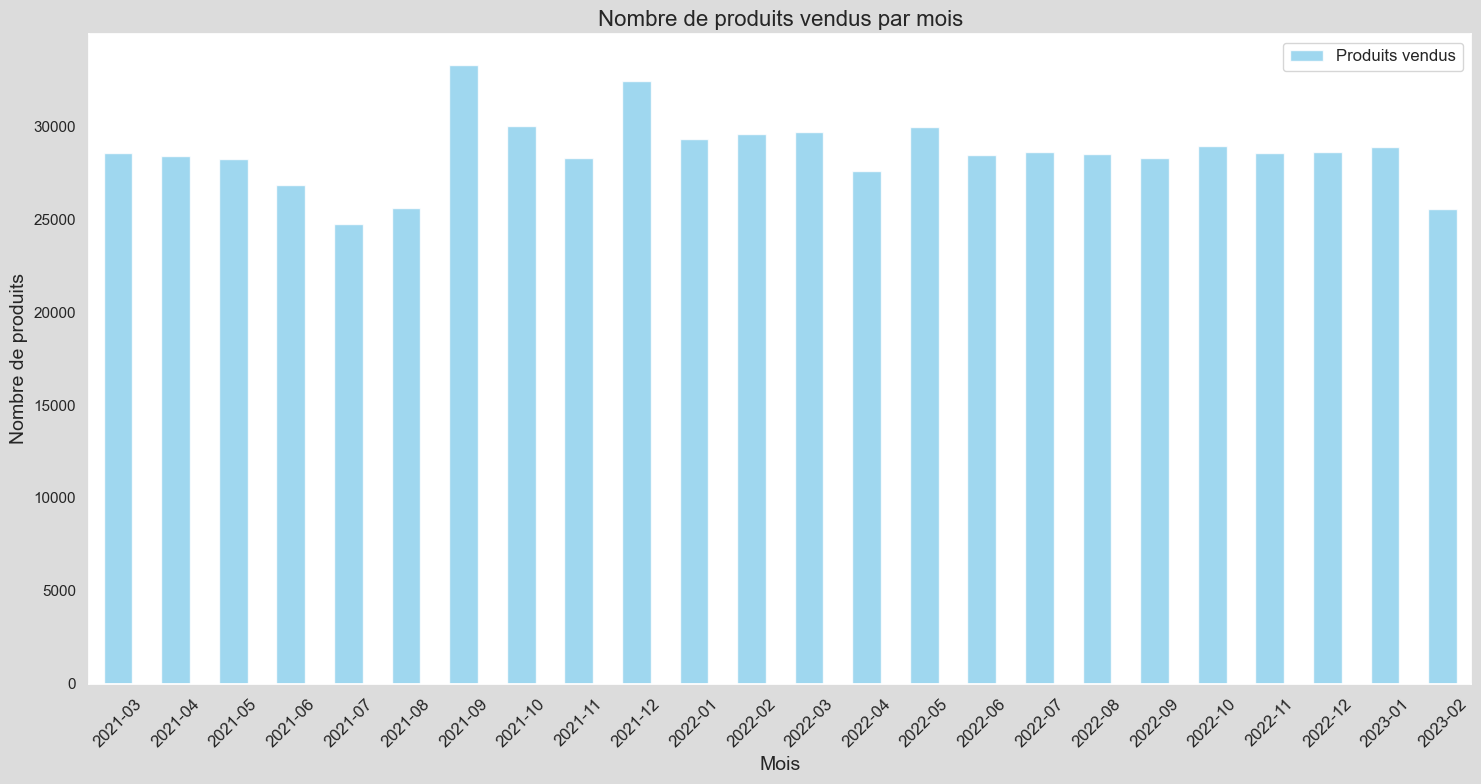

In [90]:
merge_global_comp_mois_produit.set_index('mois', inplace=True)

# Création du graphique
plt.figure(figsize=(10, 6))

# Graphique en barres
merge_global_comp_mois_produit.plot(kind='bar', color='skyblue', alpha=0.8)

# Forcer les étiquettes des ticks
plt.xticks(
    ticks=range(len(merge_global_comp_mois_produit)),  
    labels=merge_global_comp_mois_produit.index,       
    rotation=45,
    fontsize=12
)

# Configuration du graphique
plt.title("Nombre de produits vendus par mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Nombre de produits", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(['Produits vendus'], fontsize=12, loc='upper right')

# Affichage
plt.savefig('nombre_produits_mois.png', bbox_inches='tight')
plt.show()

### Analyse multivariée

On observe une certaine constance dans le nombre de transactions par mois, on observe tout de même une chute durant l'été 2021, que l'on avait aussi observé dans l'évolution du chiffre d'affaires précedemment.

#### Corrélation entre le genre des clients et les catégories de livres achetés

In [91]:
from scipy.stats import chi2_contingency
#Corrélation entre le genre des clients et les catégories de livres achetés
#H0 : La catégorie de livres achetés est indépendante du sexe du client
#H1 : La catégorie de livres achetés dépend du sexe du client
contingence_1 = pd.crosstab(merge_global['sex'], merge_global['categ'])

# Calculer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingence_1)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")


Statistique Chi-2: 158.25417617304882
Valeur p: 4.3205822283997063e-35
Degrés de liberté: 2


Avec une valeur p beaucoup plus petite que le seuil typique (généralement 0,05 ou 0,01), on rejette l'hypothèse nulle (H₀).
La catégorie de livres achetés semble bien dépendre du sexe du client.

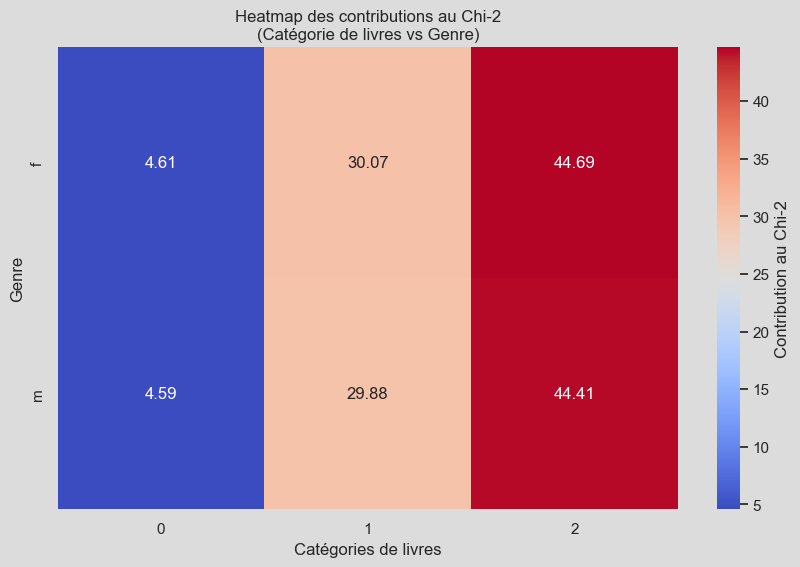

In [92]:
# Contributions au Chi-2
contrib = (contingence_1 - expected) ** 2 / expected
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contrib, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Contribution au Chi-2'})
plt.title("Heatmap des contributions au Chi-2\n(Catégorie de livres vs Genre)")
plt.xlabel("Catégories de livres")
plt.ylabel("Genre")
plt.savefig("heatmap_genre_categ.png", bbox_inches="tight")
plt.show()



Il existe une association significative entre le genre et les catégories de livres particulièrement sur certaines catégories. Les catégories 1 et 2 montrent des contributions particulièrement élevées, ce qui signifie qu’il y a probablement une sur- ou sous-représentation marquée dans ces combinaisons. Un effort de ciblage sur les genres peut être réalisé.

In [93]:
contingence_1

categ       0       1      2
sex                         
f      206103  119307  17283
m      209356  116285  19200

#### Corrélation entre l'âge des clients et le montant total des achats

Avant de choisir un test de corrélation adapté, il nous faut mesure la normalité de nos variables.

In [94]:
#Test de la normalité de la variable montant dépensé

from scipy.stats import kstest
import numpy as np

# Grouper par 'client_id' et obtenir les données nécessaires
merge_global_comp_age = merge_global.groupby(['client_id']).agg({'price': ['sum'], 'session_id' : ['count'], 'age' : ['first']}).reset_index()

# Extraire l'âge et supprimer les valeurs manquantes
age = merge_global_comp_age['age'].dropna()

# Test de Kolmogorov-Smirnov (KS) contre la distribution normale
# Utilisation de la méthode std() de pandas, qui ne déclenche pas d'avertissement.
statistic, p_value = kstest(age, 'norm', args=(np.mean(age), age.std(ddof=0)))  # Calcul de l'écart-type avec ddof=0

# Afficher les résultats
print(f"Statistique du test KS : {statistic}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données de l'âge suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données de l'âge ne suivent pas une distribution normale (on rejette H0)")


Statistique du test KS : [0.06396251]
Valeur p : [4.95113307e-31]
Les données de l'âge ne suivent pas une distribution normale (on rejette H0)


In [95]:
#Test de la normalité de la variable montant depensé

price = merge_global_comp_age['price'].dropna()

# Test de Kolmogorov-Smirnov (KS) contre la distribution normale
# Utilisation de la méthode std() de pandas pour calculer l'écart-type de 'price'
statistic, p_value = kstest(price, 'norm', args=(np.mean(price), price.std(ddof=0)))  # Calcul de l'écart-type avec ddof=0 sur 'price'

# Afficher les résultats
print(f"Statistique du test KS : {statistic}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données des achats suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données des achats ne suivent pas une distribution normale (on rejette H0)")

Statistique du test KS : [0.39461307]
Valeur p : [0.]
Les données des achats ne suivent pas une distribution normale (on rejette H0)


In [96]:
#H0 (hypothèse nulle) : Il n'y a pas de relation monotone entre les deux variables.
#H1 (hypothèse alternative) : Il existe une relation monotone entre les deux variables.
from scipy.stats import spearmanr

# Calculer la corrélation de Spearman
stat, p_value = spearmanr(age, price)

print(f"Statistique de Spearman : {stat}")
print(f"Valeur p : {p_value}")


Statistique de Spearman : -0.18437922668402615
Valeur p : 1.2375767775277552e-66


Il existe une relation monotone significative, mais faible et inversement proportionnelle entre les deux variables.
L'hypothèse nulle (H0), qui stipule qu'il n'y a pas de relation, est rejetée à cause de la très faible valeur p.
Les personnes plus jeunes tendent à dépenser moins, mais cette relation est faible. Cela suggère que l'âge pourrait avoir une influence modeste sur les dépenses, mais ce n'est pas un facteur dominant.

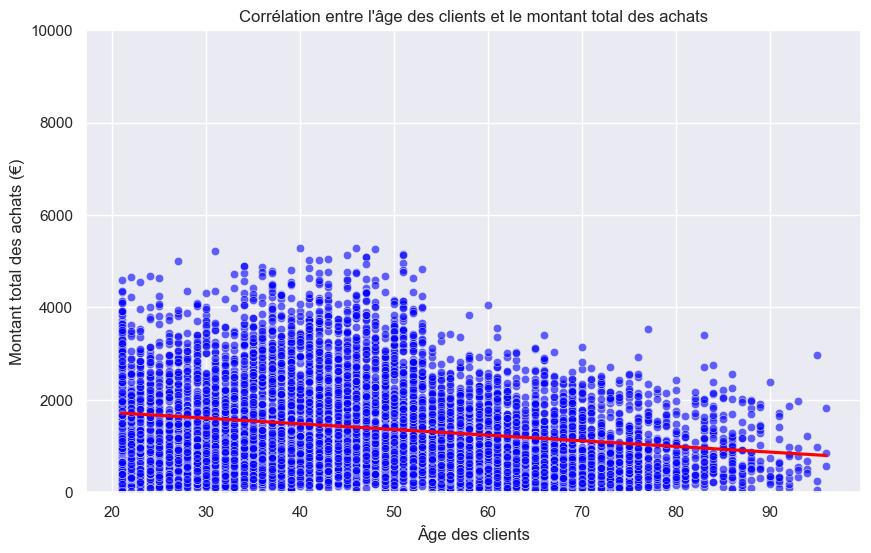

In [97]:
merge_global_comp_age.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in merge_global_comp_age.columns]

sns.set(rc={'figure.figsize': (10, 6)})
sns.scatterplot(data=merge_global_comp_age, x='age_first', y='price_sum', color="blue", alpha=0.6)

# Ajout d'une ligne de tendance pour visualiser la corrélation
sns.regplot(data=merge_global_comp_age, x='age_first', y='price_sum', scatter=False, color="red", ci=None)
plt.ylim(0, 10000)
plt.title("Corrélation entre l'âge des clients et le montant total des achats")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total des achats (€)")
plt.savefig("scatter_age_montant.png", bbox_inches='tight')
plt.show()

La ligne de régression montre une légère pente descendante. Cela indique que, globalement, le montant total des achats diminue légèrement avec l'âge.
Cependant, la pente est faible, ce qui suggère que l'effet de l'âge sur le montant des achats est limité. La corrélation est donc faible ou modérée.

#### Corrélation entre l'âge des clients et la fréquence d'achat

Création de la variable frequence d'achat par mois

In [98]:
# Group par client pour calculer le nombre total d'achats et les dates min/max
frequences_achat = merge_global .groupby('client_id').agg(
    total_achat=('session_id', 'count'),  
    premier_achat=('date_only', 'min'),  
    dernier_achat=('date_only', 'max'),
    age=('age', 'first')
).reset_index()

# Calculer la durée active en jours pour chaque client
frequences_achat['jour_actif'] = (frequences_achat['dernier_achat'] - frequences_achat['premier_achat']).dt.days + 1


# Calculer la fréquence d'achat (achats par mois, approximativement 30 jours)
frequences_achat['frequence_achat_par_mois'] = frequences_achat['total_achat'] / (frequences_achat['jour_actif'] / 30)

frequences_achat


client_id  total_achat premier_achat dernier_achat   age  jour_actif  \
0          c_1           43    2021-06-11    2023-01-15  70.0         584   
1         c_10           58    2021-03-21    2023-01-27  69.0         678   
2        c_100            8    2021-04-20    2022-09-20  33.0         519   
3       c_1000          126    2021-03-13    2023-01-24  59.0         683   
4       c_1001          103    2021-03-07    2023-02-23  43.0         719   
...        ...          ...           ...           ...   ...         ...   
8595     c_995           14    2021-04-08    2022-11-21  70.0         593   
8596     c_996           96    2021-03-01    2023-02-21  55.0         723   
8597     c_997           59    2021-04-30    2023-02-05  31.0         647   
8598     c_998           55    2021-03-18    2023-02-22  24.0         707   
8599     c_999           46    2021-07-10    2023-02-10  61.0         581   

      frequence_achat_par_mois  
0                     2.208904  
1                     2.566372  
2                     0.462428  
3                     5.534407  
4                     4.297636  
...                        ...  
8595                  0.708263  
8596                  3.983402  
8597                  2.735703  
8598                  2.333805  
8599                  2.375215  

[8600 rows x 7 columns]

In [99]:
#Test de la normalité des valeurs de fréquence d'achat 
#H0 : la fréquence d'achat suit une loi normale
#H1 : la fréquence d'achat ne suit pas une loi normale

from scipy.stats import kstest
import numpy as np

frequence = frequences_achat['frequence_achat_par_mois'].dropna()

# Test de Kolmogorov-Smirnov (KS) contre la distribution normale
# Utilisation de la méthode std() de pandas, qui ne déclenche pas d'avertissement.
statistic, p_value = kstest(frequence, 'norm', args=(np.mean(frequence), frequence.std(ddof=0)))  # Calcul de l'écart-type avec ddof=0

# Afficher les résultats
print(f"Statistique du test KS : {statistic}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Statistique du test KS : 0.3960931292508637
Valeur p : 0.0
Les données ne suivent pas une distribution normale (on rejette H0)


In [100]:
#H0 (hypothèse nulle) : Il n'y a pas de relation monotone entre les deux variables.
#H1 (hypothèse alternative) : Il existe une relation monotone entre les deux variables.
import scipy.stats as stats

age = frequences_achat['age'].dropna()
frequence = frequences_achat['frequence_achat_par_mois'].dropna()

correlation, p_value = stats.spearmanr(age, frequence)

# Affichage des résultats
print("Coefficient de corrélation de Spearman:", correlation)
print("Valeur p:", p_value)

# Interprétation
if p_value < 0.05:
    print("Il existe une relation significative entre l'âge et la fréquence d'achat.")
else:
    print("Il n'existe pas de relation significative entre l'âge et la fréquence d'achat.")


Coefficient de corrélation de Spearman: 0.11776609189369824
Valeur p: 6.100470512675825e-28
Il existe une relation significative entre l'âge et la fréquence d'achat.


Cependant cette relation reste faible, déterminée par le coefficient de corrélation de Spearman.

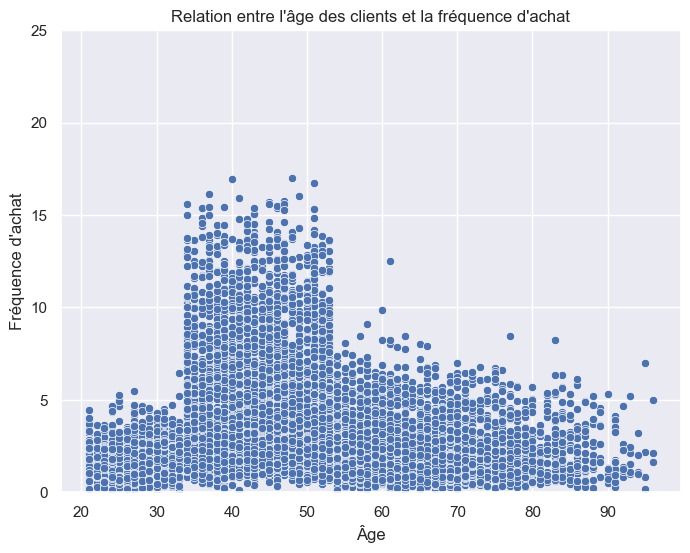

In [101]:
# Création du scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=age, y=frequence)

plt.ylim(0, 25)


plt.title('Relation entre l\'âge des clients et la fréquence d\'achat')
plt.xlabel('Âge')
plt.ylabel('Fréquence d\'achat')


plt.savefig("scatter_age_frequence.png", bbox_inches='tight')
plt.show()

On observe visuellement que les adultes de 35 à 55 ans achètent plus fréquemment que les autres tranches d'âge.

#### Corrélation entre l'âge des clients et la taille du panier moyen

Création des variables utiles

In [102]:
panier_moyen = merge_global .groupby('session_id').agg(
    client=('client_id', 'first'),  
    age=('age', 'first'),
    montant=('price', 'sum')
).reset_index()

In [103]:
panier_moyen_client = panier_moyen .groupby('client').agg(
    montant_moyen=('montant', 'mean'),
    age=('age', 'first')
).reset_index()

In [104]:
#Test de la normalité des valeurs du montant moyen
#H0 : le montant moyen suit une loi normale
#H1 : le montant moyen ne suit pas une loi normale

montant_moyen = panier_moyen_client['montant_moyen'].dropna()
mean = np.mean(montant_moyen)
std = np.std(montant_moyen)
# Test de Kolmogorov-Smirnov (KS) contre la distribution normale
# Utilisation de la méthode std() de pandas, qui ne déclenche pas d'avertissement.
statistic, p_value = kstest(montant_moyen, 'norm', args=(mean, std))  # Calcul de l'écart-type avec ddof=0

# Afficher les résultats
print(f"Statistique du test KS : {statistic}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Statistique du test KS : 0.18750971329870358
Valeur p : 3.325591173836911e-265
Les données ne suivent pas une distribution normale (on rejette H0)


In [105]:
# Calculer la corrélation de Spearman
age = panier_moyen_client['age'].dropna()

stat, p_value = spearmanr(age, montant_moyen)

print(f"Statistique de Spearman : {stat}")
print(f"Valeur p : {p_value}")

Statistique de Spearman : -0.7004399832703465
Valeur p : 0.0


Relation faible et positive : Les personnes plus âgées pourraient avoir panier moyen un peu moins élevé, mais cet effet est faible. Les jeunes dépensent en moyenne plus dans certains contextes (par exemple, loisirs, consommation immédiate).
Les personnes plus âgées peuvent être plus économes ou avoir des dépenses moyennes plus faibles pour certaines catégories de produits ou services.

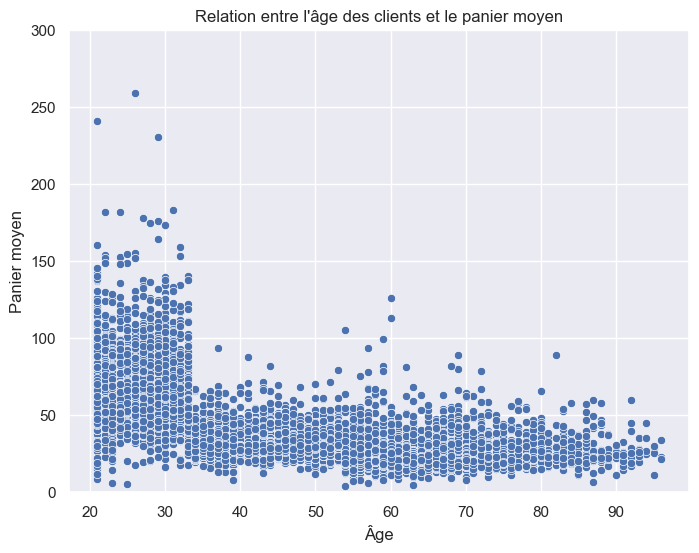

In [106]:
# Création du scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=age, y=montant_moyen)

plt.ylim(0, 300)

# Ajouter un titre et des étiquettes
plt.title('Relation entre l\'âge des clients et le panier moyen')
plt.xlabel('Âge')
plt.ylabel('Panier moyen')

plt.savefig("scatter_age_panier.png", bbox_inches='tight')
plt.show()

Les jeunes adultes de 20 à 30 ans ont un panier moyen plus élevé que les autres tranches d'âge. Peut-être sont ils plus sensibles aux ventes additionnelles que les adultes ? Pour cela, il pourrait être utile d'avoir accès aux informations concernant la durée de visite du site web. Est-ce que celle ci est corrélée avec le montant du panier moyen ?

Pour essayer de comprendre cette corrélation, voyons si le panier moyen diffère avec le temps.

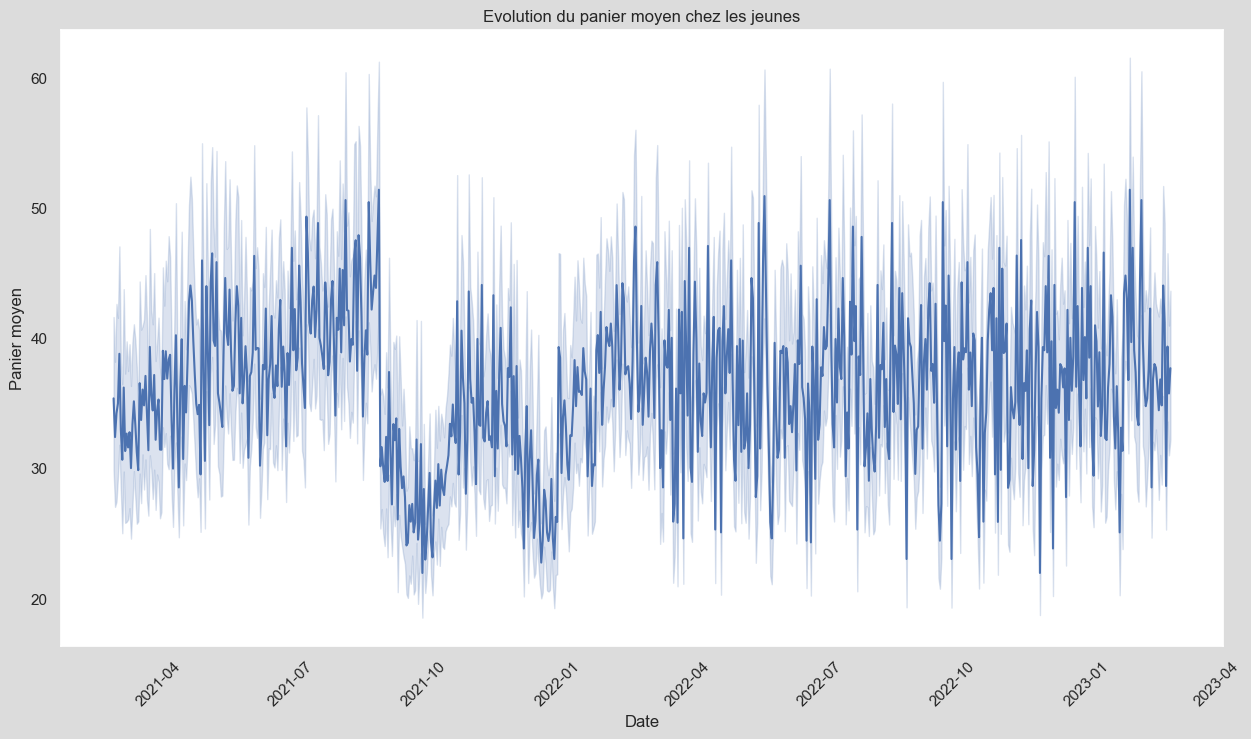

In [107]:
merge_jeune = merge_global.loc[merge_global['age'] < 35]
merge_jeune_date = merge_jeune.groupby('session_id').agg({
    'date_only': 'min',
    'price': 'sum'
}).reset_index()


sns.set(rc={'figure.figsize': (15, 8), 'axes.facecolor': 'white', 'figure.facecolor': 'gainsboro'})
graph3 = sns.lineplot(data=merge_jeune, x='date_only', y='price')


# Ajuster les ticks sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)
plt.title("Evolution du panier moyen chez les jeunes")
plt.xlabel("Date")
plt.ylabel("Panier moyen")
plt.savefig("evolution_panier.png", bbox_inches='tight')
plt.show()

Le panier moyen chez les jeunes semblent tout de même corrélées avec la temporalité. On observe une hausse au moment de la rentrére scolaire pour  un déclin presque brutal sur le mois d'octobre jusqu'en janvier. Cependant il est impossible d'affirmer avec certitude que la saisonalité (rentrée des classes) soit la seule explication de l'augmentation du panier moyen chez les jeunes.

#### Corrélation entre l'âge des clients et la catégorie des livres achetés

In [108]:
merge_global = merge_global.copy() 

from scipy.stats import kruskal


In [109]:
# Groupement des données par modalité
groupes = [group["age"].values for _, group in merge_global.groupby("categ")]

# Test de Kruskal-Wallis
stat, p_value = kruskal(*groupes)
print(f"Statistique de Kruskal-Wallis : {stat:.3f}, p-value : {p_value:.3f}")

if p_value < 0.05:
    print("Il existe une différence significative entre les groupes.")
else:
    print("Aucune différence significative entre les groupes.")


Statistique de Kruskal-Wallis : 78458.438, p-value : 0.000
Il existe une différence significative entre les groupes.


In [110]:
from scipy.stats import mannwhitneyu

groupes = merge_global.groupby("categ")["age"].apply(list)

# Comparer chaque paire de groupes
pairs = [(0, 1), (0, 2), (1, 2)]

for (g1, g2) in pairs:
    data1 = groupes[g1]
    data2 = groupes[g2]
    
    stat, p_value = mannwhitneyu(data1, data2)
    print(f"Comparaison {g1} vs {g2} : Statistique U = {stat:.3f}, p-value = {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"Il y a une différence significative entre {g1} et {g2}.")
    else:
        print(f"Aucune différence significative entre {g1} et {g2}.")


Comparaison 0 vs 1 : Statistique U = 41241943051.000, p-value = 0.000
Il y a une différence significative entre 0 et 1.
Comparaison 0 vs 2 : Statistique U = 13942531217.500, p-value = 0.000
Il y a une différence significative entre 0 et 2.
Comparaison 1 vs 2 : Statistique U = 7614196373.000, p-value = 0.000
Il y a une différence significative entre 1 et 2.


Visualisons cette corrélation ensemble

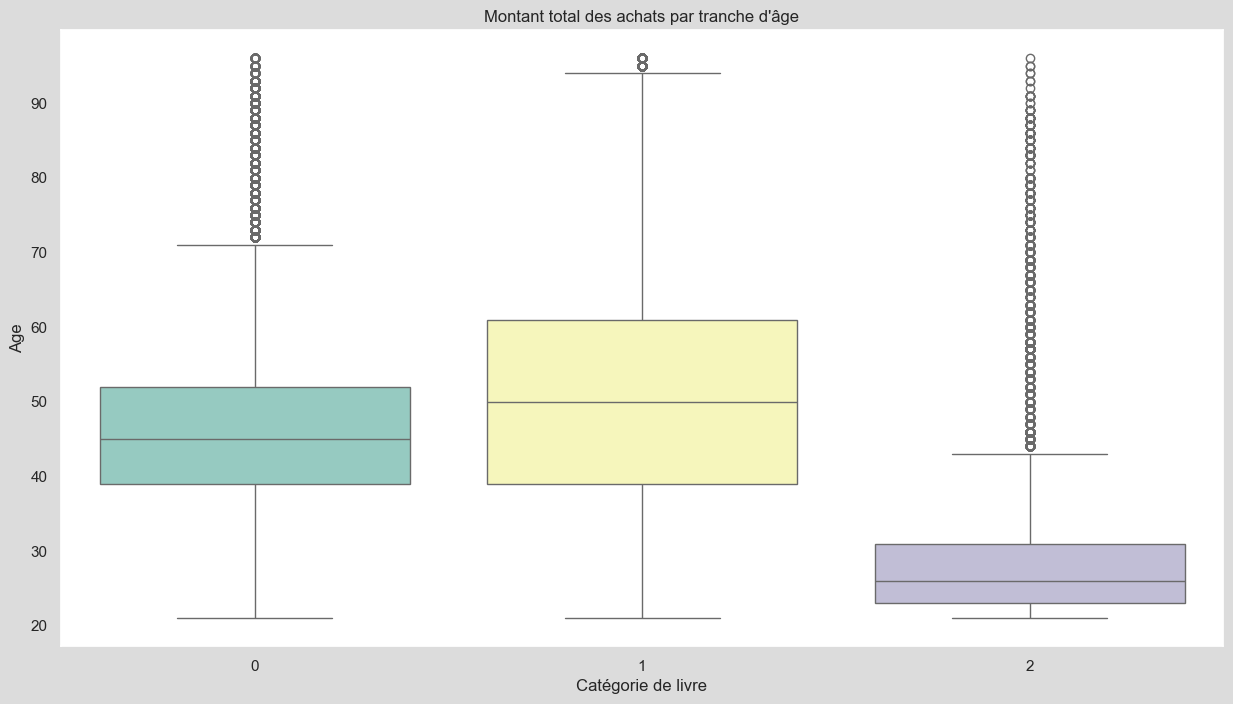

In [111]:
#Génération de boxplot

sns.boxplot(data=merge_global, x='categ', y='age', hue='categ', palette="Set3", legend=False)
plt.title("Montant total des achats par tranche d'âge")
plt.xlabel("Catégorie de livre")
plt.ylabel("Age")
plt.savefig("boxplot_montantachat_age.png", bbox_inches='tight')
plt.show()

La visualisation des boîtes à moustache confirment le test Kruskal-Wallis, on observe une sensibilité de certaines catégories à des tranches d'âges spécifiques. La catégorie 2 touche essentiellement les plus jeunes notamment.

## Analyses complémentaires

### Explications de la chute du C.A en octobre 2021

Nous allons mener des analyses complémentaires pour tenter d'expliquer la chute notable des ventess en octobre 2021, pour cela nous allons segmenter l'évolution du C.A par classes d'âges

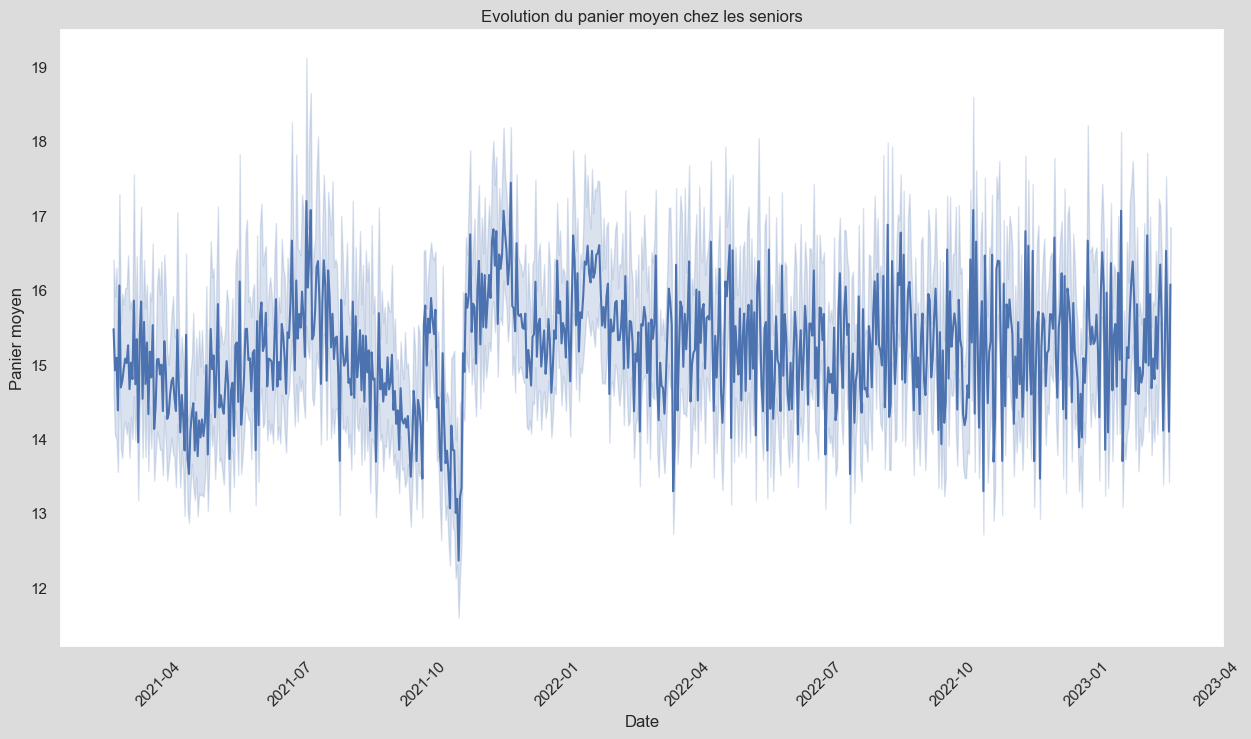

In [112]:
merge_senior = merge_global.loc[merge_global['age'] > 45]

merge_senior_date = merge_senior.groupby('session_id').agg({
    'date_only': 'min',
    'price': 'sum'
}).reset_index()


sns.set(rc={'figure.figsize': (15, 8), 'axes.facecolor': 'white', 'figure.facecolor': 'gainsboro'})
graph3 = sns.lineplot(data=merge_senior, x='date_only', y='price')


# Ajuster les ticks sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)
plt.title("Evolution du panier moyen chez les seniors")
plt.xlabel("Date")
plt.ylabel("Panier moyen")
plt.savefig("evolution_panier.png", bbox_inches='tight')
plt.show()

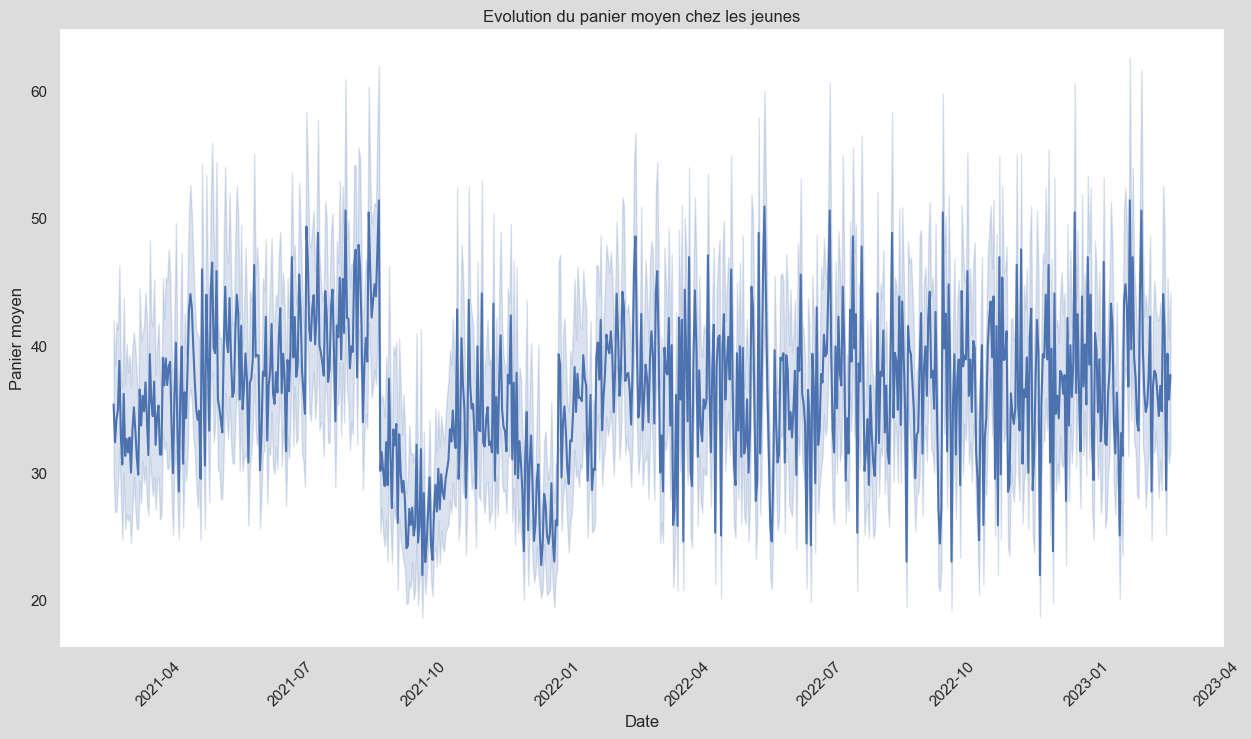

In [113]:
sns.set(rc={'figure.figsize': (15, 8), 'axes.facecolor': 'white', 'figure.facecolor': 'gainsboro'})
graph3 = sns.lineplot(data=merge_jeune, x='date_only', y='price')


# Ajuster les ticks sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)
plt.title("Evolution du panier moyen chez les jeunes")
plt.xlabel("Date")
plt.ylabel("Panier moyen")
plt.savefig("evolution_panier.png", bbox_inches='tight')
plt.show()

Les jeunes et les seniors connaissent la même chute des ventes, cependant elle reste plus marquée et précoce chez les jeunes, et semble corrélée avec les dates de rentrée scolaire et universitaire, qui pourrait donner un début d'explication à cette chute. En octobre, les jeunes (notamment les 18-25 ans) peuvent consacrer davantage de budget à des dépenses liées aux études (matériel scolaire, frais universitaires, etc.) plutôt qu'aux loisirs (livres, produits en vente sur Lapage).